# **Milestone 1 Phase 1**

## **Introduction**

Nama: Luthfi Fadhlillah 
<br>
Batch: FTDS 009

---


## Dataset Description

| Description | Columns |
| :- | :- |
| Customers who left within the last month | Churn |
| Services that each customer has signed up for | phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies |
| Customer account information | how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges |
| Demographic info about customers | gender, age range, and if they have partners and dependents | 

### Details

| Columns | Description |
| --- | --- |
| customer ID | ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

Sumber: https://www.kaggle.com/blastchar/telco-customer-churn

## Objective

Tujuan dari proyek ini adalah untuk membuat model prediksi churn menggunakan sequential API dan functional API.

# Import Library

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from keras.wrappers import scikit_learn
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from tensorflow.keras import initializers, optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, concatenate
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import losses
import pickle

print(f"Tensorflow ver: {tf.__version__}")
print(f"Scikit-Learn ver: {sklearn.__version__}")

Tensorflow ver: 2.8.0
Scikit-Learn ver: 1.0.2


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

Melakukan load data yang akan digunakan dalam assignment ini

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Dataset Exploration

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dari hasil di atas, kita dapat melihat bahwa sebagian besar kolom berisi data kategoris, bisa berupa data kategorik nominal atau ordinal. Untuk mengetahui hal ini, kita harus memeriksa  unique value yang dimiliki masing-masing data kategorikal ini.

In [5]:
print(df.shape)
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

Dataset ini berisi 7043 baris dan 21 kolom. Dari 21, ada kolom bernama "Churn" yang akan menjadi variabel target, sedangkan 20 kolom sisanya adalah prediktor dan unique identifier.

Jika kita melihat ke dalam masing-masing tipe data kolom, mungkin ada satu kolom yang ditetapkan dengan tipe data yang tidak tepat. Kolom itu adalah TotalCharges. Dari hasil di atas, tipe data TotalCharges adalah objek, tetapi secara intuitif kita tahu bahwa nama kolom mungkin berisi angka karena terkait dengan total biaya yang dibebankan kepada pelanggan sebagai imbalan atas layanan perusahaan, yang seharusnya dalam bentuk money-currency format. Untuk mengecek asumsi tersebut, kita bisa mengecek nilai kolom TotalCharges.

In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Setelah dicek pada kolom TotalCharges, kita mengetahui bahwa asumsi sebelumnya benar, yang artinya ini adalah kesalahan. Dengan demikian, kita dapat melakukan beberapa prosedur dalam data cleaning untuk mengubahnya menjadi tipe data yang tepat.

Untuk saat ini, saya hanya akan menggunakan dataset asli untuk quick exploaration.

In [7]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Skala atau rentang angka di antara kolom numerik cukup berbeda, terutama antara tenur dan MonhtlyCharges. Sementara kita juga tahu dari tabel di atas, SeniorCitizen bukanlah data numerik nyata dari nilai yang dimilikinya, tetapi data nominal yang sudah diencod ke dalam bentuk binary. Pada kolom SeniorCitizen, 1 berarti pelanggan adalah warga senior, dan 0 berarti pelanggan bukan warga senior.

In [8]:
df.select_dtypes(object).describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Kecuali untuk customerID dan TotalCharges yang sebelumnya disebutkan sebagai unique identifier dan invalid data type, kolom kategorikal memiliki kardinalitas yang relatif rendah karena hanya memiliki maksimal 4 unique values (yaitu: PaymentMethod).

# Data Cleaning

## Clean Whitespace

Dari eksplorasi dataset, kita mengetahui bahwa TotalCharges telah terbaca dalam tipe data yang tidak valid. Ini mungkin karena adanya string yang mewakili nilai yang hilang, atau adanya spasi kosong di antara nilai-nilai tersebut.

Referensi : https://www.codingem.com/remove-spaces-from-string-in-python/

In [9]:
cols = list(df.columns)

In [10]:
for i in range(len(cols)):
    if df[cols[i]].dtypes == object:
        print('Char (- or _ or , or /):', df[cols[i]].str.lower().str.contains('-|_|,|/').sum(), '-', cols[i])

Char (- or _ or , or /): 7043 - customerID
Char (- or _ or , or /): 0 - gender
Char (- or _ or , or /): 0 - Partner
Char (- or _ or , or /): 0 - Dependents
Char (- or _ or , or /): 0 - PhoneService
Char (- or _ or , or /): 0 - MultipleLines
Char (- or _ or , or /): 0 - InternetService
Char (- or _ or , or /): 0 - OnlineSecurity
Char (- or _ or , or /): 0 - OnlineBackup
Char (- or _ or , or /): 0 - DeviceProtection
Char (- or _ or , or /): 0 - TechSupport
Char (- or _ or , or /): 0 - StreamingTV
Char (- or _ or , or /): 0 - StreamingMovies
Char (- or _ or , or /): 3875 - Contract
Char (- or _ or , or /): 0 - PaperlessBilling
Char (- or _ or , or /): 0 - PaymentMethod
Char (- or _ or , or /): 0 - TotalCharges
Char (- or _ or , or /): 0 - Churn


In [11]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [12]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Untuk 2 kolom, kolom  customerID dan Contract memiliki special character di dalamnya (spasi dan strip)

In [13]:
for i in range(len(cols)):
    if df[cols[i]].dtypes == object:
        print('Whitespace:', df[cols[i]].str.isspace().sum(), '-', cols[i])

Whitespace: 0 - customerID
Whitespace: 0 - gender
Whitespace: 0 - Partner
Whitespace: 0 - Dependents
Whitespace: 0 - PhoneService
Whitespace: 0 - MultipleLines
Whitespace: 0 - InternetService
Whitespace: 0 - OnlineSecurity
Whitespace: 0 - OnlineBackup
Whitespace: 0 - DeviceProtection
Whitespace: 0 - TechSupport
Whitespace: 0 - StreamingTV
Whitespace: 0 - StreamingMovies
Whitespace: 0 - Contract
Whitespace: 0 - PaperlessBilling
Whitespace: 0 - PaymentMethod
Whitespace: 11 - TotalCharges
Whitespace: 0 - Churn


Seperti yang diduga sebelumnya, TotalCharges tipe datanya tidak tepat karena adanya spasi kosong di antara nilainya. Mari kita periksa baris mana yang berisi spasi.

In [14]:
df[df['TotalCharges'].str.contains(' ')][['TotalCharges']]

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


Baris di atas berisi spasi dan tidak ada nilai yang tersedia. Dengan demikian, spasi tersebut bisa dikatakan sebagai missing value. Oleh karena itu, sebagai solusinya, kita dapat memilih teknik mana yang akan menangani missing value yang sesuai.

Untuk TotalCharges, karena hanya memiliki sejumlah kecil missing value (yaitu 11 baris), kita bisa mendropnya karena kita tidak akan kehilangan banyak informasi  dari dataset.

In [15]:
df = df.replace(' ', np.NaN)

In [16]:
for i in range(len(cols)):
    if df[cols[i]].dtypes == object:
        print('Whitespace:', df[cols[i]].str.isspace().sum(), '-', cols[i])

Whitespace: 0 - customerID
Whitespace: 0 - gender
Whitespace: 0 - Partner
Whitespace: 0 - Dependents
Whitespace: 0 - PhoneService
Whitespace: 0 - MultipleLines
Whitespace: 0 - InternetService
Whitespace: 0 - OnlineSecurity
Whitespace: 0 - OnlineBackup
Whitespace: 0 - DeviceProtection
Whitespace: 0 - TechSupport
Whitespace: 0 - StreamingTV
Whitespace: 0 - StreamingMovies
Whitespace: 0 - Contract
Whitespace: 0 - PaperlessBilling
Whitespace: 0 - PaymentMethod
Whitespace: 0 - TotalCharges
Whitespace: 0 - Churn


## Convert TotalCharges into proper format (into float64)

Saya akan mengubah tipe data TotalCharges menjadi tipe yang tepat (yaitu float).

In [17]:
df['TotalCharges'].dtypes

dtype('O')

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [19]:
df['TotalCharges'].dtypes

dtype('float64')

Kolom TotalCharges sudah diubah kedalam bentuk tipe data float.

## Missing Values

Melakukan pengecekan missing values

In [20]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Tidak ada kolom lain yang memiliki missing values kecuali TotalCharges yang terdeteksi sebelumnya.

In [21]:
df['TotalCharges'].isnull().sum()

11

Drop baris yang memiliki missing values pada kolom TotalCharges.

In [22]:
df.dropna(inplace = True)

In [23]:
df['TotalCharges'].isnull().sum()

0

## Duplicate Rows

Lakukan pengecekan terhadap duplicate rows

In [24]:
df.duplicated().any()

False

Tidak terdapat duplicate rows dalam datasets.

# Exploratory Data Analysis (EDA)

## Numerical Features

In [25]:
numerical_coloumns = df.select_dtypes("number").columns.tolist()
print(f"Cols: {numerical_coloumns}\nLen: {len(numerical_coloumns)}")

Cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Len: 4


Melakukan pengecekan distribusi numerical features.

**Jika skeewness kurang dari -1 atau lebih besar dari 1, distribusinya highly skewed. Jika skewnessnya antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya moderately skewed. Jika skewness antara -0,5 dan 0,5, distribusinya simetris.**

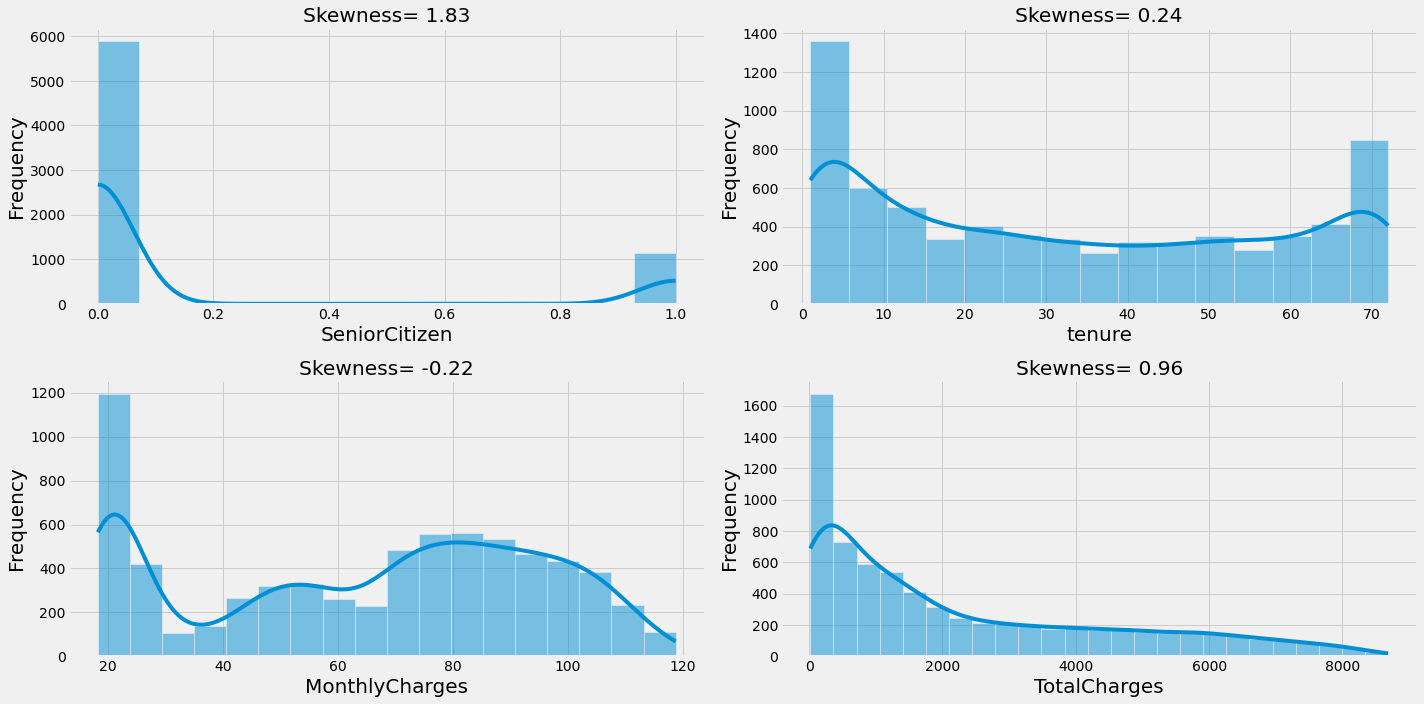

In [28]:
plt.figure(figsize=(20, 10))
for i in range(len(numerical_coloumns)):
    plt.subplot(len(numerical_coloumns)//2, 2, i+1)
    ax = sns.histplot(
        df[numerical_coloumns[i]],
        kde = True
    )
    ax.set_xlabel(numerical_coloumns[i], fontsize = 20)
    ax.set_ylabel("Frequency", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df[numerical_coloumns[i]].skew(),2))}")
plt.tight_layout()
plt.show()

- SeniorCitizen hanya memiliki 2 unique values yang sebenarnya bukanlah numerical features melainkan categorical feature dalam bntuk binary.
- tenure dan MonthlyCharges memiliki distribusi yang cukup simetris karena memiliki skewness lebih besar dari -0,5 dan kurang dari 0,5 seperti penjelesan diatas.
- TotalCharges merupakan skewed positif karena outliers berada disebelah kanan dari tails.

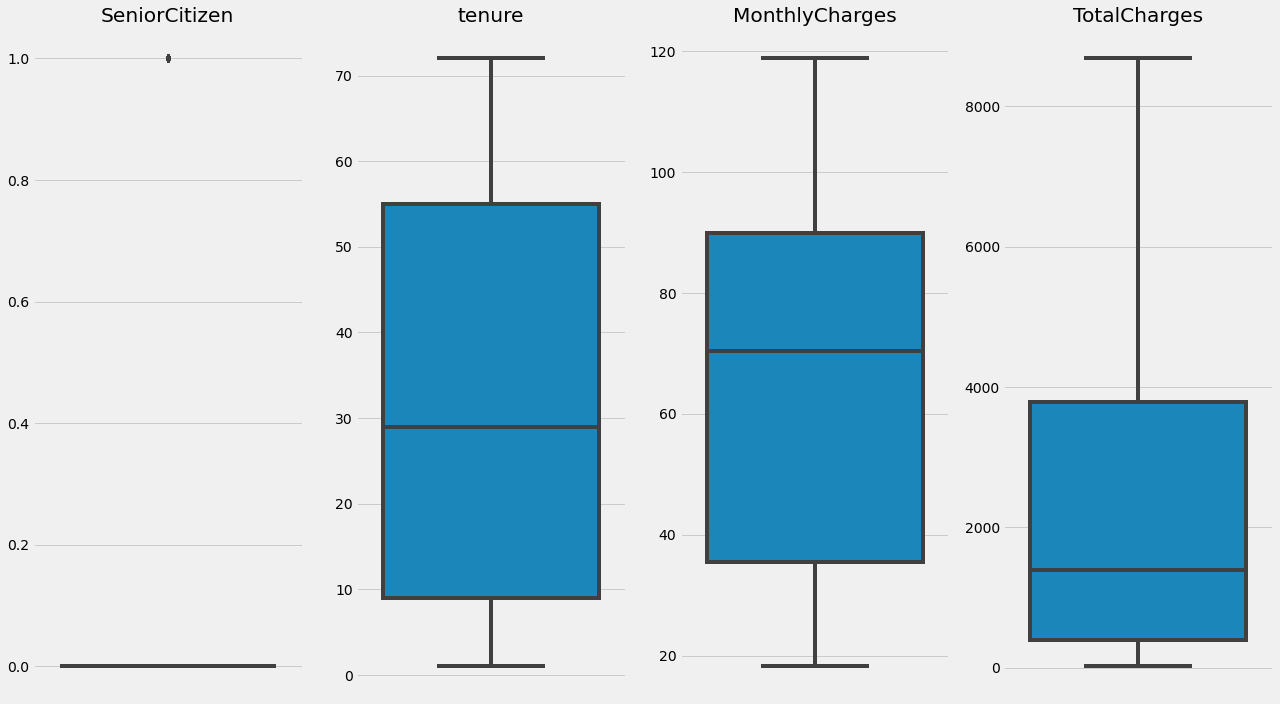

In [29]:
plt.figure(figsize=(18, 10))
for i in range(len(numerical_coloumns)):
    plt.subplot(len(numerical_coloumns)//4, 4, i+1)
    ax = sns.boxplot(
        y = df[numerical_coloumns[i]]
    )
    ax.set_ylabel('')
    ax.set_title(numerical_coloumns[i])
plt.tight_layout()
plt.show()

In [30]:
print(f"tenure median: {df['tenure'].median()}")
print(f"MonthlyCharges median: {df['MonthlyCharges'].median()}")
print(f"TotalCharges median: {df['TotalCharges'].median()}")

tenure median: 29.0
MonthlyCharges median: 70.35
TotalCharges median: 1397.475


Sebagian besar pelanggan telah menggunakan layanan telco selama 29 bulan, dengan memiliki MonthlyCharges sebesar 70,35, dan TotalCharges sebesar 1397.475.

---

Melakukan pengecekan distribusi dan hubungan antara 2 variabel, terutama terhdapa variabel target.

In [34]:
palette = {"Yes" : '#035397', "No" : '#E8630A'}

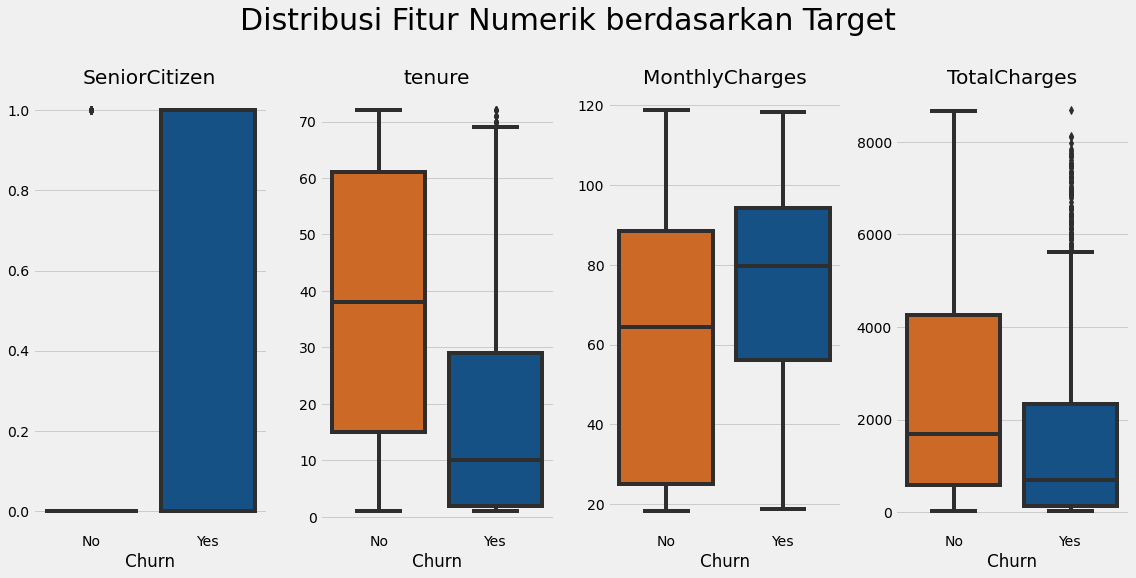

In [37]:
plt.figure(figsize=(16, 8))
plt.suptitle('Distribusi Fitur Numerik berdasarkan Target', fontsize = 30, y = 1.005)
for i in range(len(numerical_coloumns)):
    plt.subplot(len(numerical_coloumns)//4, 4, i+1)
    ax = sns.boxplot(
        y = df[numerical_coloumns[i]],
        x = df['Churn'],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(numerical_coloumns[i])
plt.tight_layout()
plt.show()

- Sebagian besar orang yang telah melakukan churn, memiliki tenure yang lebih kecil, MonthlyCharges yang lebih besar, dan TotalCharges yang lebih kecil.

- Boxplot SeniorCitizen tidak menampilkan informasi yang jelas tentang distribusi setiap kelas karena merupakan variabel binary/biner. Meskipun tampaknya mayoritas orang yang tidak melakukan churn memiliki SeniorCitizen=0 atau bukan warga senior, kita tidak dapat memastikan apakah outlier di SeniorCitizen=1 hanya beberapa titik data atau memiliki jumlah data yang jauh lebih banyak. Saya akan melakukan pengecekan persentase pada fitur SeniorCitizen untuk nilai 0 dan 1.

In [38]:
percentage_senior_citizen = df.groupby(["SeniorCitizen"]).count()[["customerID"]]
percentage_senior_citizen['percentage'] = percentage_senior_citizen['customerID']*100/sum(percentage_senior_citizen['customerID'])
percentage_senior_citizen.columns = ['count', 'percentage']
percentage_senior_citizen

,count,percentage
SeniorCitizen,,
0,5890,83.759954
1,1142,16.240046


In [39]:
# Persentase Senior Citizen
senior_citizen_dist = df.groupby(["SeniorCitizen", "Churn"]).count()[["customerID"]]
senior_citizen = df.groupby(["SeniorCitizen"]).count()[["customerID"]]
senior_citizen_dist["percentage"] = senior_citizen_dist.div(senior_citizen, level = "SeniorCitizen") * 100
senior_citizen_dist.columns = ["count", "percentage"]
senior_citizen_dist

count  percentage
SeniorCitizen Churn                   
0             No      4497   76.349745
              Yes     1393   23.650255
1             No       666   58.318739
              Yes      476   41.681261

In [40]:

churn_dist = df.groupby(["Churn", "SeniorCitizen"]).count()[["customerID"]]
churn = df.groupby(["Churn"]).count()[["customerID"]]
churn_dist["percentage"] = churn_dist.div(churn, level = "Churn") * 100
churn_dist.columns = ["count", "percentage"]
churn_dist

count  percentage
Churn SeniorCitizen                   
No    0               4497   87.100523
      1                666   12.899477
Yes   0               1393   74.531835
      1                476   25.468165

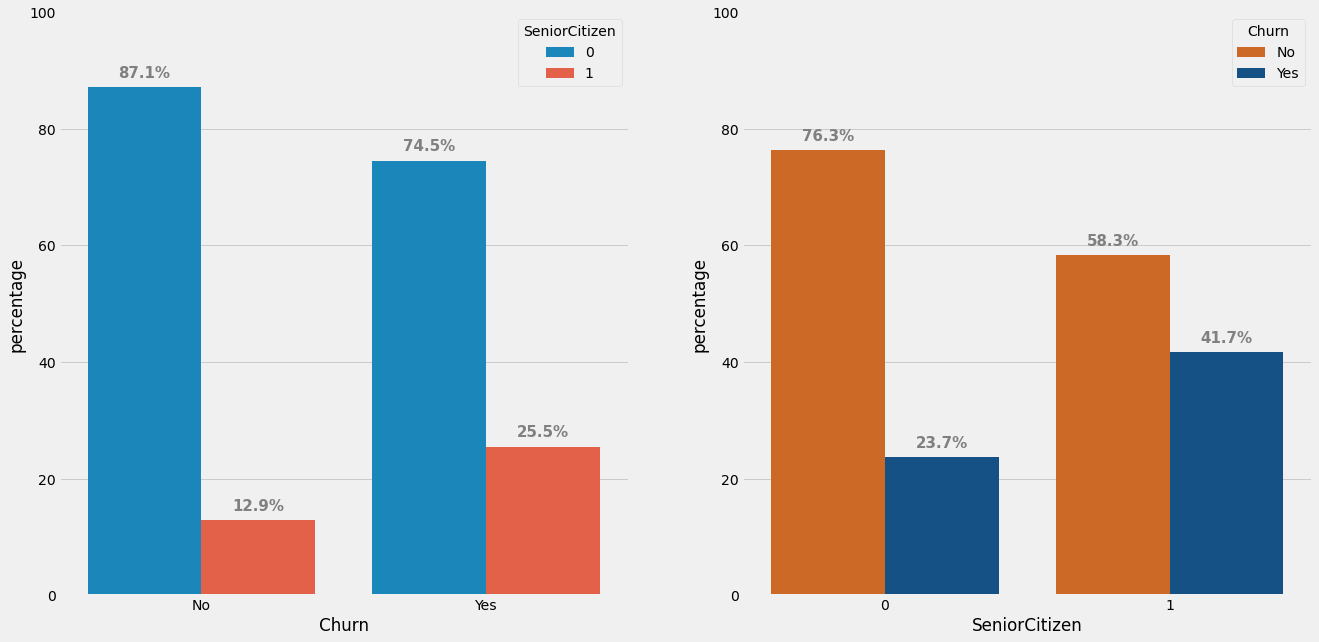

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
ax = sns.barplot(
    data = churn_dist.reset_index(),
    x = 'Churn', y = 'percentage', hue = 'SeniorCitizen'
)
plt.yticks(range(0, 120, 20))
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + "%",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 15,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'gray'
    )
    
plt.subplot(1, 2, 2)
ax = sns.barplot(
    data = senior_citizen_dist.reset_index(),
    x = 'SeniorCitizen', y = 'percentage', hue = 'Churn', palette = palette
)
plt.yticks(range(0, 120, 20))
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f') + "%",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 15,
        xytext = (0, 10), 
        textcoords = 'offset points',
        color = 'gray'
    )
    
plt.show()

- Mayortitas customer yang melakukan Churn bukanlah SeniorCitizen (SeniorCitizen=0), SeniorCitizen hanya memberikan kontribusi sebesar 25.5% terhadap total customer yang melakukan churn.

- Jika kita membandingkan rasio SeniorCitizen dan bukan SeniorCitizen terhadap churn, pelanggan yang merupakan SeniorCitizen memiliki rasio yang lebih besar daripada pelanggan yang churn.

Membuat fungsi untuk menghitung quartile 1 dan quartile 3 yang tidak tersedia dalam fungsi agregat groupby.

In [43]:
def q1(x):
    '''
    calculate quantile 1
    can be used in aggregate function
    '''
    return x.quantile(0.25)
def q3(x):
    '''
    calculate quantile 3
    can be used in aggregate function
    '''
    return x.quantile(0.75)

Mengecek nilai median yang tepat dari setiap numerical column dan setiap nilai variabel target.

In [44]:
df[["Churn", "customerID"] + numerical_coloumns].groupby('Churn').agg({
    'customerID':['count'],
    'SeniorCitizen':[q1, 'median', q3],
    'tenure':['median'],
    'MonthlyCharges':['median'],
    'TotalCharges':['median']
})

customerID SeniorCitizen             tenure MonthlyCharges TotalCharges
           count            q1 median   q3 median         median       median
Churn                                                                        
No          5163           0.0    0.0  0.0   38.0          64.45      1683.60
Yes         1869           0.0    0.0  1.0   10.0          79.65       703.55

Dari tabel di atas, kita tahu bahwa:
- SeniorCitizen memang data kategorikal biner. Dengan demikian, skewness tidak dapat ditangani dengan menggunakan handlinh outlier untuk kolom numerik.
- tenure dari customer yang melakukan churn lebih kecil daripada yang tidak melakukan churn. Untuk customer yang melakukan churn adalah 10 bulan dan untuk customer yang tidak melakukan churn adalah 38 bulan. 
- MonthlyCharges dari customer yang melakukan churn lebih besar daripada mereka yang tidak melakukan churn. Untuk customer yang melakukan churn, MonthlyCahrges adalah 79,65 dan untuk customer yang tidak melakukan churn adalah 64,45.
- TotalCharges customer yang melakukan churn lebih kecil daripada mereka yang tidak melakukan churn. Untuk customer yang melakukan churn TotalCharges adalah 703,55 dan untuk customer yang tidak melakukan churn adalah 1683,60. 

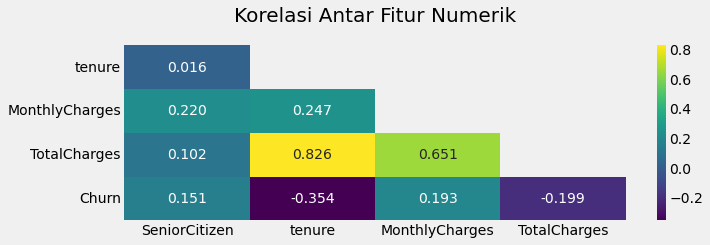

In [45]:
df_corr = df.copy()
df_corr['Churn'] = np.where(df_corr['Churn'] == "Yes", 1, 0)

corr_ = df_corr[numerical_coloumns + ["Churn"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns=['Churn'], index = 'SeniorCitizen')

plt.figure(figsize = (10, 3))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'viridis'
)
plt.title("Korelasi Antar Fitur Numerik",fontsize=20, y=1.1)
plt.yticks(rotation=0)
plt.show()

In [46]:
highly_correlated = corr_.round(decimals = 3)[corr_.round(decimals = 3)> 0.5].dropna(axis=0, how="all").dropna(axis=1, how="all")
highly_correlated

,tenure,MonthlyCharges
TotalCharges,0.826,0.651


- Korelasi heatmap di atas tidak menunjukkan korelasi yang tinggi antara fitur-fitur tersebut dengan target variable.
- Ada beberapa fitur yang memiliki korelasi tinggi satu sama lain (yaitu TotalCharges-tenure dan TotalCharges-MonthlyCharges).

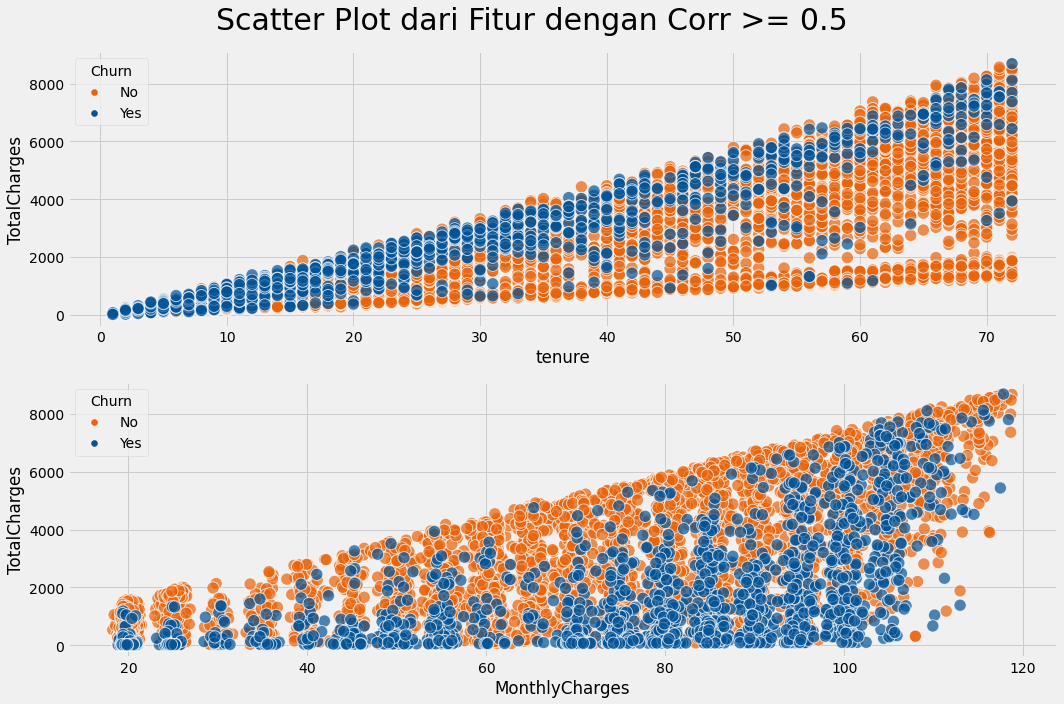

In [48]:
df_sort = df.sort_values('Churn')
fig, axes = plt.subplots(2, 1, figsize = (15, 10))
plt.suptitle('Scatter Plot dari Fitur dengan Corr >= 0.5', fontsize = 30)
sns.scatterplot(x = df_sort['tenure'], y = df_sort['TotalCharges'], ax = axes[0], hue = df_sort['Churn'], palette = palette, s = 150, alpha = 0.7)
axes[0].set_xlabel('tenure')
axes[0].set_ylabel('TotalCharges')

sns.scatterplot(x = df_sort['MonthlyCharges'], y = df_sort['TotalCharges'], ax = axes[1], hue = df_sort['Churn'], palette = palette, s = 150, alpha = 0.7)
axes[1].set_xlabel('MonthlyCharges')
axes[1].set_ylabel('TotalCharges')

plt.tight_layout()
plt.show()

- Peningkatan TotalCharges untuk customer yang melakukan churn konsisten untuk tenure yang lebih besar. Sedangkan untuk customer yang tidak melakukan churn, kenaikan TotalCharges bervariasi, ada customer yang memiliki kenaikan lebih besar untuk tenure yang lebih besar, tetapi juga ada customer yang memiliki kenaikan lebih sedikit dibandingkan dengan yang tidak churn.

## Categorical Features

In [49]:
categorical_colomns = df.drop(columns=['customerID', 'Churn']).select_dtypes(object).columns.tolist()
print(f"Cols: {categorical_colomns}\nLen: {len(categorical_colomns)}")

Cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Len: 15


Mengecek distribusi dari fitur kategorik

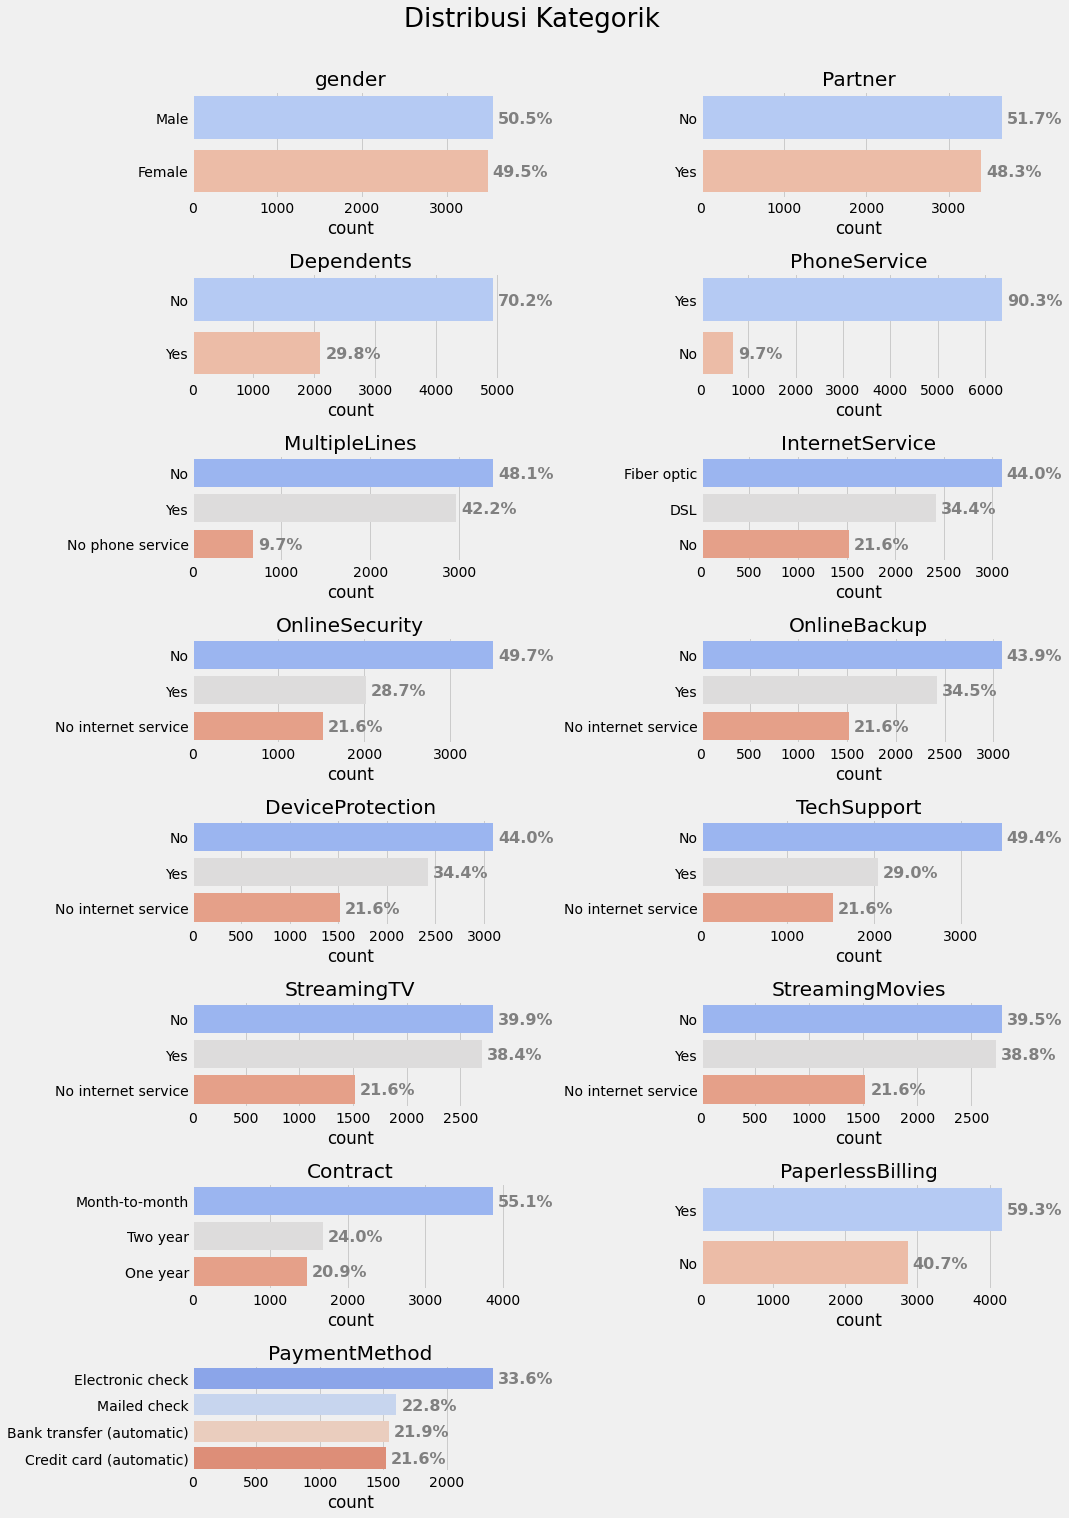

In [53]:
plt.figure(figsize=(15, 21))
plt.suptitle('Distribusi Kategorik', fontsize=26, y = 1.005)
for i in range(len(categorical_colomns)):
    plt.subplot(len(categorical_colomns)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df[categorical_colomns[i]], palette = 'coolwarm', order = df[categorical_colomns[i]].value_counts().index
    )
    ax.set_ylabel('')
    ax.set_title(categorical_colomns[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width()*100/len(df), '.1f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=16
        )
plt.tight_layout()
plt.show()

- Distribusi gender laki-laki dan perempuan kurang lebih sama, hanya selisih 1%.
- Distribusi fitur Partner untuk pelanggan yang memiliki partner dan yang tidak memiliki partner kurang lebih sama, dengan selisih 3.4%.
- Sekitar 70% customer tidak memiliki Dependents/tanggungan.

In [54]:
phone_service = df.groupby(['PhoneService', 'MultipleLines']).count()[['customerID']]
cat_group = df.groupby(["PhoneService"]).count()[["customerID"]]
phone_service["percentage"] = phone_service.div(cat_group, level = "PhoneService") * 100
phone_service.reset_index(inplace = True)
phone_service.columns = ["PhoneService", "MultipleLines", "count", "percentage"]
phone_service.set_index(["PhoneService", "MultipleLines"])

count  percentage
PhoneService MultipleLines                      
No           No phone service    680  100.000000
Yes          No                 3385   53.290302
             Yes                2967   46.709698

- Sekitar 90% customer menggunakan PhonesService.
- Di antara 90% customer tersebut, sekitar 53% tidak menggunakan MultipleLines dan 47% menggunakan MultipleLines.

In [55]:
df_internet = df.copy()
df_internet['UseInternetService'] = np.where(
    df_internet['InternetService'].isin(['DSL', 'Fiber optic']), 'Yes', 'No'
)

internet_service = df_internet.groupby(['UseInternetService', 'InternetService']).count()[['customerID']]
cat_group = df_internet.groupby(["UseInternetService"]).count()[["customerID"]]
internet_service["percentage"] = internet_service.div(cat_group, level = "UseInternetService") * 100
internet_service.reset_index(inplace = True)
internet_service.columns = ["UseInternetService", "InternetService", "count", "percentage"]
internet_service.set_index(["UseInternetService", "InternetService"])

count  percentage
UseInternetService InternetService                   
No                 No                1520   100.00000
Yes                DSL               2416    43.83164
                   Fiber optic       3096    56.16836

- Sekitar 78% customer menggunakan InternetService,
- Dari 78% customer tersebut, sekitar 56% menggunakan InternetService fiber optic, dan 43% menggunakan InternetService DSL.

**Fiber Optic**

In [56]:
internet_service_os = df.groupby(['InternetService', 'OnlineSecurity']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_os["percentage"] = internet_service_os.div(cat_group, level = "InternetService") * 100
internet_service_os.reset_index(inplace = True)
internet_service_os.columns = ["InternetService", "OnlineSecurity", "count", "percentage"]
internet_service_os.set_index(["InternetService", "OnlineSecurity"])

count  percentage
InternetService OnlineSecurity                        
DSL             No                    1240   51.324503
                Yes                   1176   48.675497
Fiber optic     No                    2257   72.900517
                Yes                    839   27.099483
No              No internet service   1520  100.000000

- Mayoritas customer atau 72% customer yang menggunakan InternetServuce fiber optic, tidak menggunakan Online Security.

In [57]:
internet_service_ob = df.groupby(['InternetService', 'OnlineBackup']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_ob["percentage"] = internet_service_ob.div(cat_group, level = "InternetService") * 100
internet_service_ob.reset_index(inplace = True)
internet_service_ob.columns = ["InternetService", "OnlineBackup", "count", "percentage"]
internet_service_ob.set_index(["InternetService", "OnlineBackup"])

count  percentage
InternetService OnlineBackup                          
DSL             No                    1334   55.215232
                Yes                   1082   44.784768
Fiber optic     No                    1753   56.621447
                Yes                   1343   43.378553
No              No internet service   1520  100.000000

In [58]:
internet_service_dp = df.groupby(['InternetService', 'DeviceProtection']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_dp["percentage"] = internet_service_dp.div(cat_group, level = "InternetService") * 100
internet_service_dp.reset_index(inplace = True)
internet_service_dp.columns = ["InternetService", "DeviceProtection", "count", "percentage"]
internet_service_dp.set_index(["InternetService", "DeviceProtection"])

count  percentage
InternetService DeviceProtection                      
DSL             No                    1355   56.084437
                Yes                   1061   43.915563
Fiber optic     No                    1739   56.169251
                Yes                   1357   43.830749
No              No internet service   1520  100.000000

- Rasio customer yang menggunakan backup online, Device Protection, dan yang tidak menggunakan keduanya sekitar 43%:57%

**DSL**

In [59]:
internet_service_ts = df.groupby(['InternetService', 'TechSupport']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_ts["percentage"] = internet_service_ts.div(cat_group, level = "InternetService") * 100
internet_service_ts.reset_index(inplace = True)
internet_service_ts.columns = ["InternetService", "TechSupport", "count", "percentage"]
internet_service_ts.set_index(["InternetService", "TechSupport"])

count  percentage
InternetService TechSupport                           
DSL             No                    1242   51.407285
                Yes                   1174   48.592715
Fiber optic     No                    2230   72.028424
                Yes                    866   27.971576
No              No internet service   1520  100.000000

In [60]:
internet_service_stv = df.groupby(['InternetService', 'StreamingTV']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_stv["percentage"] = internet_service_stv.div(cat_group, level = "InternetService") * 100
internet_service_stv.reset_index(inplace = True)
internet_service_stv.columns = ["InternetService", "StreamingTV", "count", "percentage"]
internet_service_stv.set_index(["InternetService", "StreamingTV"])

count  percentage
InternetService StreamingTV                           
DSL             No                    1463   60.554636
                Yes                    953   39.445364
Fiber optic     No                    1346   43.475452
                Yes                   1750   56.524548
No              No internet service   1520  100.000000

In [61]:
internet_service_sm = df.groupby(['InternetService', 'StreamingMovies']).count()[['customerID']]
cat_group = df.groupby(["InternetService"]).count()[["customerID"]]
internet_service_sm["percentage"] = internet_service_sm.div(cat_group, level = "InternetService") * 100
internet_service_sm.reset_index(inplace = True)
internet_service_sm.columns = ["InternetService", "StreamingMovies", "count", "percentage"]
internet_service_sm.set_index(["InternetService", "StreamingMovies"])

count  percentage
InternetService StreamingMovies                       
DSL             No                    1436   59.437086
                Yes                    980   40.562914
Fiber optic     No                    1345   43.443152
                Yes                   1751   56.556848
No              No internet service   1520  100.000000

- Rasio customer layanan internet DSL yang menggunakan OnlineSecuirty dan yang tidak menggunakan sekitar (48%:51%).
- Rasio customer yang menggunakan backup online dan yang tidak menggunakan sekitar (44%:55%).
- Rasio customer yang menggunakan Device Protection dan yang tidak menggunakan yaitu (43%:56%).
- Rasio customer yang menggunakan TechSupport dan yang tidak menggunakan yaitu (48%:51%).
- Sekitar 60% customer, tidak menggunakan layanan streaming untuk TV dan film.

**Paperless Billing**

In [62]:
paperless_billing = df.groupby(['PaperlessBilling', 'PaymentMethod']).count()[['customerID']]
cat_group = df.groupby(["PaperlessBilling"]).count()[["customerID"]]
paperless_billing["percentage"] = paperless_billing.div(cat_group, level = "PaperlessBilling") * 100
paperless_billing.reset_index(inplace = True)
paperless_billing.columns = ["PaperlessBilling", "PaymentMethod", "count", "percentage"]
paperless_billing.set_index(["PaperlessBilling", "PaymentMethod"])

count  percentage
PaperlessBilling PaymentMethod                               
No               Bank transfer (automatic)    653   22.800279
                 Credit card (automatic)      639   22.311453
                 Electronic check             623   21.752793
                 Mailed check                 949   33.135475
Yes              Bank transfer (automatic)    889   21.329175
                 Credit card (automatic)      882   21.161228
                 Electronic check            1742   41.794626
                 Mailed check                 655   15.714971

- Sekitar 59% customer (mayoritas) ditagih secara paperless dan 41% tidak.
- Di antara 59% pelanggan yang ditagih secara paperless, sebagian besar atau 41% menggunakan metode pembayaran cek elektronik.
- Di antara 41% pelanggan yang tidak ditagih secara paperless, sebagian besar atau 33% menggunakan metode pembayaran Mailed check.

In [63]:
paperless_billing = df.groupby(['PaymentMethod', 'PaperlessBilling']).count()[['customerID']]
cat_group = df.groupby(["PaymentMethod"]).count()[["customerID"]]
paperless_billing["percentage"] = paperless_billing.div(cat_group, level = "PaymentMethod") * 100
paperless_billing.reset_index(inplace = True)
paperless_billing.columns = ["PaymentMethod", "PaperlessBilling", "count", "percentage"]
paperless_billing.set_index(["PaymentMethod", "PaperlessBilling"])

count  percentage
PaymentMethod             PaperlessBilling                   
Bank transfer (automatic) No                  653   42.347601
                          Yes                 889   57.652399
Credit card (automatic)   No                  639   42.011834
                          Yes                 882   57.988166
Electronic check          No                  623   26.342495
                          Yes                1742   73.657505
Mailed check              No                  949   59.164589
                          Yes                 655   40.835411

- Sekitar 34% customer (mayoritas) menggunakan metode pembayaran Electronic check.
- 57% customer yang menggunakan Bank transfer (automatic) ditagih secara paperless.
- 57% customer yang menggunakan kartu kredit otomatis ditagih secara paperless.
- 73% customer yang menggunakan Electronic check ditagih secara paperless.
- 40% customer yang menggunakan Mailed check ditagih secara paperless.

---

In [64]:
cat_cols2 = ['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']

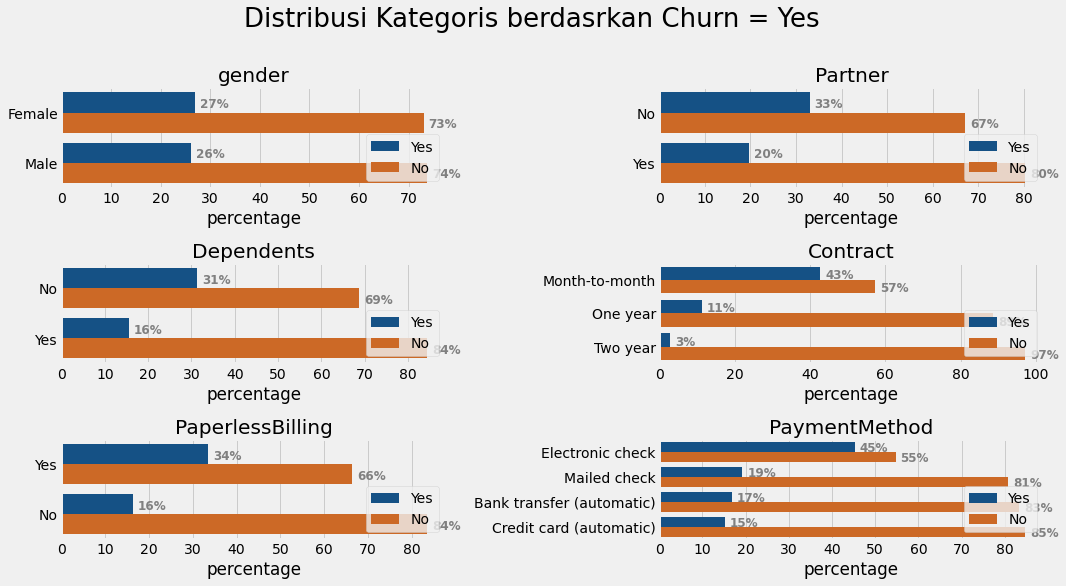

In [67]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribusi Kategoris berdasrkan Churn = Yes', fontsize=26, y = 1.005)
for i in range(len(cat_cols2)):
    
    # create percentage df
    dist = df.groupby([str(cat_cols2[i]), "Churn"]).count()[["customerID"]]
    cat_group = df.groupby([str(cat_cols2[i])]).count()[["customerID"]]
    dist["percentage"] = dist.div(cat_group, level = str(cat_cols2[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(cat_cols2[i]), "Churn", "count", "percentage"]
    
    # plot
    plt.subplot(len(cat_cols2)//2+1, 2, i+1)
    ax = sns.barplot(
        x = "percentage",
        y = str(cat_cols2[i]),
        data = dist,
        hue = 'Churn',
        hue_order = ['Yes', 'No'],
        order = dist.iloc[dist[dist['Churn'] == 'Yes']['percentage'].sort_values(ascending = False).index][str(cat_cols2[i])],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(cat_cols2[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=12
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

- Jumlah customer yang churn tidak dipengaruhi oleh gender, karena rasio kontribusi untuk setiap gender terhadap customer yanh churn hampir sama yaitu (27% Female churned : 26% Male churned)
- Sebagian besar customer yang churn tidak memiliki partner.
- Sebagian besar customer yang churn tidak memiliki dependents.

---


#### PhoneService

In [68]:
multiple_lines = df.groupby(['MultipleLines', 'PhoneService', 'Churn']).count()[['customerID']]
cat_group = df.groupby(["MultipleLines"]).count()[["customerID"]]
multiple_lines["percentage"] = multiple_lines.div(cat_group, level = "MultipleLines") * 100
multiple_lines.reset_index(inplace = True)
multiple_lines.columns = ["MultipleLines", "PhoneService", "Churn", "count", "percentage"]
multiple_lines.set_index(["MultipleLines", "PhoneService", "Churn"])

count  percentage
MultipleLines    PhoneService Churn                   
No               Yes          No      2536   74.918759
                              Yes      849   25.081241
No phone service No           No       510   75.000000
                              Yes      170   25.000000
Yes              Yes          No      2117   71.351534
                              Yes      850   28.648466

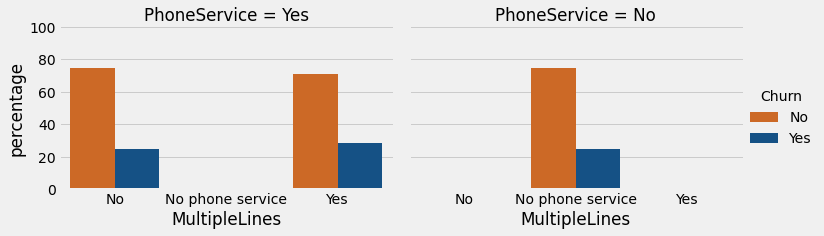

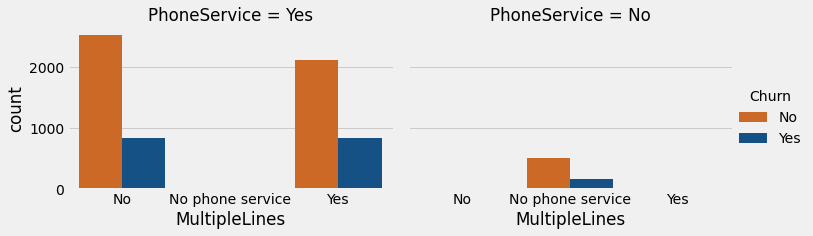

In [69]:
ax = sns.catplot(
    x="MultipleLines", y="percentage",
    hue="Churn", col="PhoneService",
    data=multiple_lines, kind="bar", palette=palette, height=3.5, aspect=1.5
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="MultipleLines", y="count",
    hue="Churn", col="PhoneService",
    data=multiple_lines, kind="bar", palette=palette, height=3.5, aspect=1.5
)

plt.show()

**Multiple Lines**

- Dari total customer yang tidak menggunakan Phone Service, hanya 25% yang melakukan churn.
- Dari total customer yang menggunakan Multiple Lines, hanya 28% yang melakukan churn.
- Dari total customer yang tidak menggunakan Multiple Lines, hanya 25% yang melakukan churn.
- Antar kelompok jenis Phone Service customer, customer yang menggunakan Phone Service baik multi line maupun single line adalah yang paling banyak memberikan kontribusi terhadap churned rate.

#### InternetService

Untuk analisis ini, kita akan membuat kolom baru yang membedakan jenis layanan internet yang dikelompokkan sebagai pelanggan yang menggunakan dan tidak menggunakan layanan internet.

In [70]:
df_internet = df.copy()
df_internet['UseInternetService'] = np.where(
    df_internet['InternetService'].isin(['DSL', 'Fiber optic']), 'Yes', 'No'
)

internet_service = df_internet.groupby(['UseInternetService', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["UseInternetService"]).count()[["customerID"]]
internet_service["percentage"] = internet_service.div(cat_group, level = "UseInternetService") * 100
internet_service.reset_index(inplace = True)
internet_service.columns = ["UseInternetService", "Churn", "count", "percentage"]
internet_service.set_index(["UseInternetService", "Churn"])

count  percentage
UseInternetService Churn                   
No                 No      1407   92.565789
                   Yes      113    7.434211
Yes                No      3756   68.142235
                   Yes     1756   31.857765

Persentase tersebut dihitung terhadap total pelanggan yang menggunakan dan tidak menggunakan layanan internet.

In [71]:
internet_service = df_internet.groupby(['UseInternetService', 'InternetService', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["UseInternetService"]).count()[["customerID"]]
internet_service["percentage"] = internet_service.div(cat_group, level = "UseInternetService") * 100
internet_service.reset_index(inplace = True)
internet_service.columns = ["UseInternetService", "InternetService", "Churn", "count", "percentage"]
internet_service.set_index(["UseInternetService", "InternetService", "Churn"])

count  percentage
UseInternetService InternetService Churn                   
No                 No              No      1407   92.565789
                                   Yes      113    7.434211
Yes                DSL             No      1957   35.504354
                                   Yes      459    8.327286
                   Fiber optic     No      1799   32.637881
                                   Yes     1297   23.530479

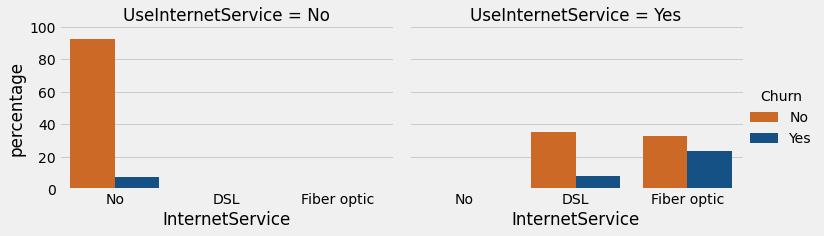

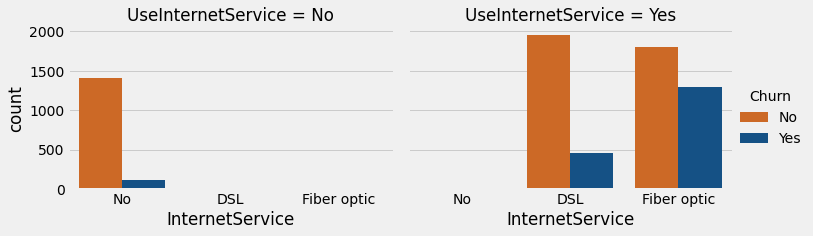

In [72]:
ax = sns.catplot(
    x="InternetService", y="percentage",
    hue="Churn", col="UseInternetService",
    data=internet_service, kind="bar", palette=palette, height=3.5, aspect=1.5
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="InternetService", y="count",
    hue="Churn", col="UseInternetService",
    data=internet_service, kind="bar", palette=palette, height=3.5, aspect=1.5
)

plt.show()

**Internet Service**

- Dari total pelanggan yang tidak menggunakan layanan internet, hanya 7% yang churn.
- Dari total pelanggan yang menggunakan layanan internet DSL, hanya 8% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet fiber optic, 23% di antaranya churn.
- Antar kelompok jenis layanan internet pelanggan, pelanggan yang menggunakan layanan internet fiber optic memberikan kontribusi terbesar terhadap churned rate.

In [73]:
online_security = df_internet.groupby(['InternetService', 'OnlineSecurity', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
online_security["percentage"] = online_security.div(cat_group, level = "InternetService") * 100
online_security.reset_index(inplace = True)
online_security.columns = ["InternetService", "OnlineSecurity", "Churn", "count", "percentage"]
online_security.set_index(["InternetService", "OnlineSecurity", "Churn"])

count  percentage
InternetService OnlineSecurity      Churn                   
DSL             No                  No       893   36.961921
                                    Yes      347   14.362583
                Yes                 No      1064   44.039735
                                    Yes      112    4.635762
Fiber optic     No                  No      1143   36.918605
                                    Yes     1114   35.981912
                Yes                 No       656   21.188630
                                    Yes      183    5.910853
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

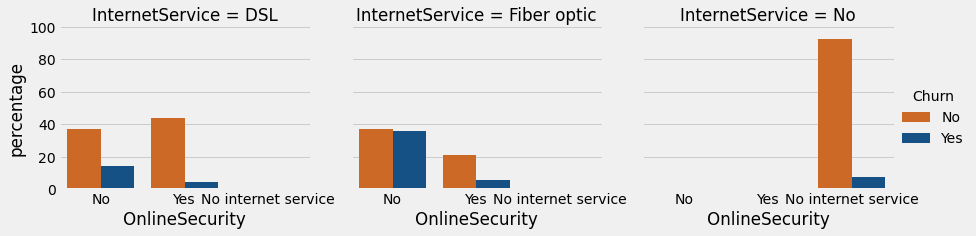

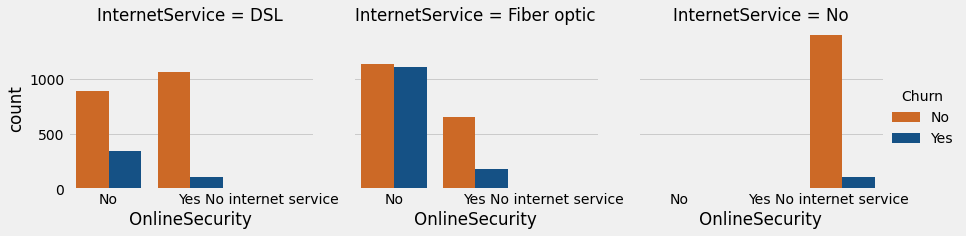

In [74]:
ax = sns.catplot(
    x="OnlineSecurity", y="percentage",
    hue="Churn", col="InternetService",
    data=online_security, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="OnlineSecurity", y="count",
    hue="Churn", col="InternetService",
    data=online_security, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Online Security**

- Dari total pelanggan yang tidak menggunakan layanan internet dan online security, hanya 7% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
    - Sekitar 18% pelanggan yang churn. 14% merupakan konrtibusi dari pelanggan yang tidak menggunakan online security, dan 4% merupakan konrtibusi dari pelanggan yang menggunakan online security.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
    - Sekitar 41% pelanggan adalah churned. 36% merupakan konrtibusi dari pelanggan yang tidak menggunakan online security, dan 5% merupakan konrtibusi dari pelanggan yang menggunakan online security.

In [75]:
online_backup = df_internet.groupby(['InternetService', 'OnlineBackup', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
online_backup["percentage"] = online_backup.div(cat_group, level = "InternetService") * 100
online_backup.reset_index(inplace = True)
online_backup.columns = ["InternetService", "OnlineBackup", "Churn", "count", "percentage"]
online_backup.set_index(["InternetService", "OnlineBackup", "Churn"])

count  percentage
InternetService OnlineBackup        Churn                   
DSL             No                  No       991   41.018212
                                    Yes      343   14.197020
                Yes                 No       966   39.983444
                                    Yes      116    4.801325
Fiber optic     No                  No       863   27.874677
                                    Yes      890   28.746770
                Yes                 No       936   30.232558
                                    Yes      407   13.145995
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

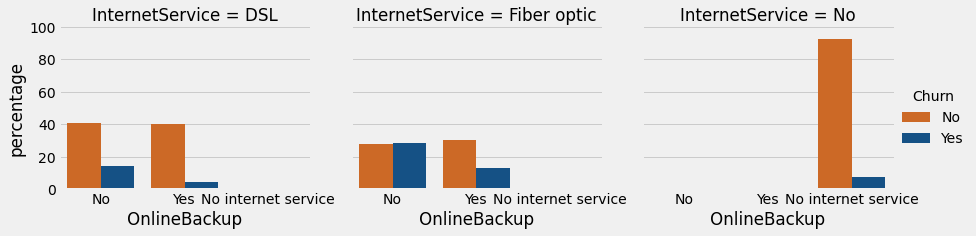

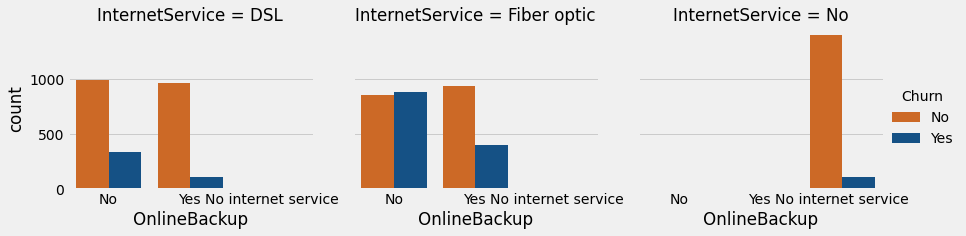

In [76]:
ax = sns.catplot(
    x="OnlineBackup", y="percentage",
    hue="Churn", col="InternetService",
    data=online_backup, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="OnlineBackup", y="count",
    hue="Churn", col="InternetService",
    data=online_backup, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Online Backup**

- Dari total pelanggan yang tidak menggunakan layanan internet dan backup online, hanya 7% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
    - Sekitar 19% pelanggan churned. 14% kontribusi dari pelanggan yang tidak menggunakan backup online, dan 5% kontibusi dari pelanggan yang menggunakan backup online.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
    - Sekitar 42% pelanggan churned. 29% kontibusi dari pelanggan yang tidak menggunakan backup online, dan 13% kontibusi dari pelanggan yang menggunakan backup online.

In [77]:
device_protection = df_internet.groupby(['InternetService', 'DeviceProtection', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
device_protection["percentage"] = device_protection.div(cat_group, level = "InternetService") * 100
device_protection.reset_index(inplace = True)
device_protection.columns = ["InternetService", "DeviceProtection", "Churn", "count", "percentage"]
device_protection.set_index(["InternetService", "DeviceProtection", "Churn"])

count  percentage
InternetService DeviceProtection    Churn                   
DSL             No                  No      1013   41.928808
                                    Yes      342   14.155629
                Yes                 No       944   39.072848
                                    Yes      117    4.842715
Fiber optic     No                  No       870   28.100775
                                    Yes      869   28.068475
                Yes                 No       929   30.006460
                                    Yes      428   13.824289
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

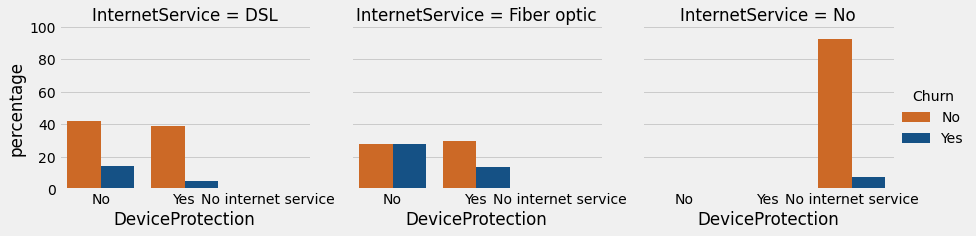

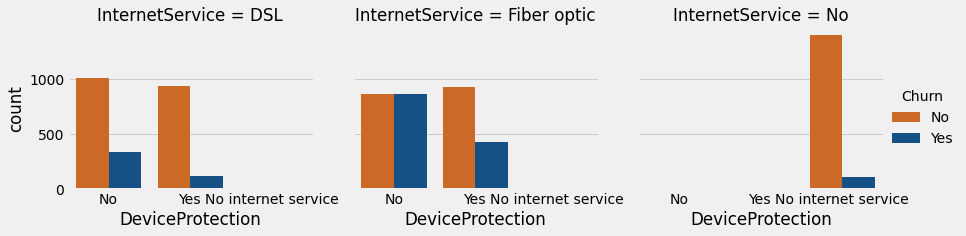

In [78]:
ax = sns.catplot(
    x="DeviceProtection", y="percentage",
    hue="Churn", col="InternetService",
    data=device_protection, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="DeviceProtection", y="count",
    hue="Churn", col="InternetService",
    data=device_protection, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Device Protection**

- Dari total pelanggan yang tidak menggunakan layanan internet dan Device Protection, hanya 7% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
    - Sekitar 19% pelanggan churn. 14% kotribusi dari pelanggan yang tidak menggunakan Device Protection, dan 5% kotribusi dari pelanggan yang menggunakan Device Protection.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
    - Sekitar 42% pelanggan churn. 28% kotribusi dari pelanggan yang tidak menggunakan Device Protection, dan 14% kotribusi dari pelanggan yang menggunakan Device Protection.

In [79]:
tech_support = df_internet.groupby(['InternetService', 'TechSupport', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
tech_support["percentage"] = tech_support.div(cat_group, level = "InternetService") * 100
tech_support.reset_index(inplace = True)
tech_support.columns = ["InternetService", "TechSupport", "Churn", "count", "percentage"]
tech_support.set_index(["InternetService", "TechSupport", "Churn"])

count  percentage
InternetService TechSupport         Churn                   
DSL             No                  No       897   37.127483
                                    Yes      345   14.279801
                Yes                 No      1060   43.874172
                                    Yes      114    4.718543
Fiber optic     No                  No      1129   36.466408
                                    Yes     1101   35.562016
                Yes                 No       670   21.640827
                                    Yes      196    6.330749
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

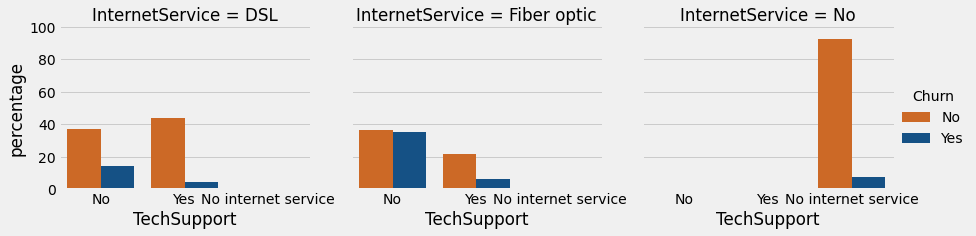

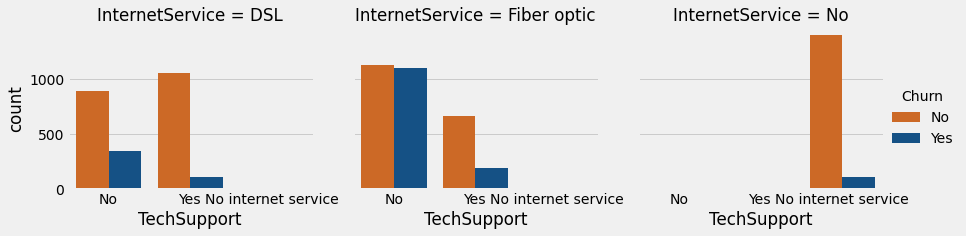

In [80]:
ax = sns.catplot(
    x="TechSupport", y="percentage",
    hue="Churn", col="InternetService",
    data=tech_support, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="TechSupport", y="count",
    hue="Churn", col="InternetService",
    data=tech_support, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Tech Support**

- Dari total pelanggan yang tidak menggunakan layanan internet dan TechSupport, hanya 7% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
    - Sekitar 19% pelanggan churn. 14% kontribusi dari pelanggan yang tidak menggunakan TechSupport, dan 5% kontribusi dari pelanggan yang menggunakan TechSupport.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
    - Sekitar 42% pelanggan churn. 36% kontribusi dari pelanggan yang tidak menggunakan TechSupport, dan 6% kontribusi dari pelanggan yang menggunakan TechSupport.

In [81]:
streaming_tv = df_internet.groupby(['InternetService', 'StreamingTV', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
streaming_tv["percentage"] = streaming_tv.div(cat_group, level = "InternetService") * 100
streaming_tv.reset_index(inplace = True)
streaming_tv.columns = ["InternetService", "StreamingTV", "Churn", "count", "percentage"]
streaming_tv.set_index(["InternetService", "StreamingTV", "Churn"])

count  percentage
InternetService StreamingTV         Churn                   
DSL             No                  No      1131   46.812914
                                    Yes      332   13.741722
                Yes                 No       826   34.188742
                                    Yes      127    5.256623
Fiber optic     No                  No       736   23.772610
                                    Yes      610   19.702842
                Yes                 No      1063   34.334625
                                    Yes      687   22.189922
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

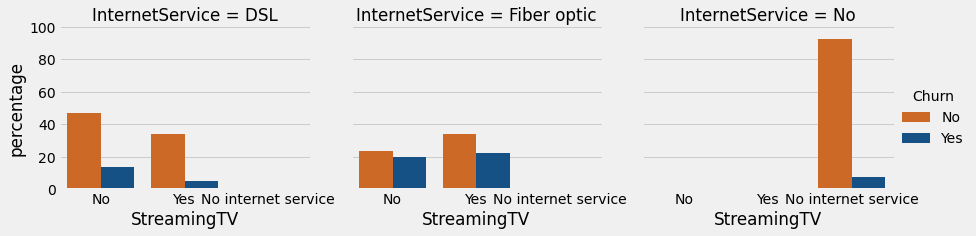

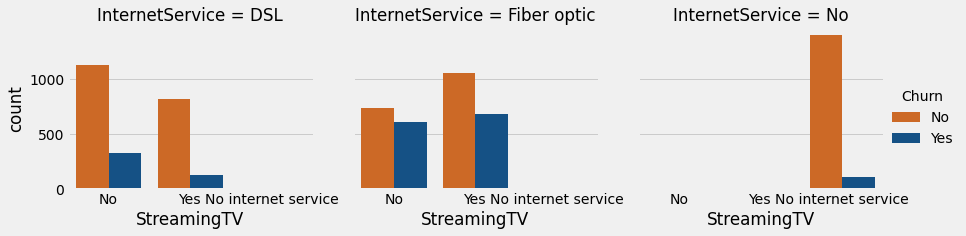

In [82]:
ax = sns.catplot(
    x="StreamingTV", y="percentage",
    hue="Churn", col="InternetService",
    data=streaming_tv, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="StreamingTV", y="count",
    hue="Churn", col="InternetService",
    data=streaming_tv, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Streaming TV**

- Dari total pelanggan yang tidak menggunakan layanan internet dan streamingTV, hanya 7% yang churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
    - Sekitar 19% pelanggan churn. 14% kontribusi dari pelanggan yang tidak menggunakan streaming tv, dan 5% kontribusi dari pelanggan yang menggunakan streaming tv.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
    - Sekitar 42% pelanggan churn. 20% kontribusi dari pelanggan yang tidak menggunakan streaming tv, dan 22% kontribusi dari pelanggan yang menggunakan streaming tv.

In [83]:
streaming_movies = df_internet.groupby(['InternetService', 'StreamingMovies', 'Churn']).count()[['customerID']]
cat_group = df_internet.groupby(["InternetService"]).count()[["customerID"]]
streaming_movies["percentage"] = streaming_movies.div(cat_group, level = "InternetService") * 100
streaming_movies.reset_index(inplace = True)
streaming_movies.columns = ["InternetService", "StreamingMovies", "Churn", "count", "percentage"]
streaming_movies.set_index(["InternetService", "StreamingMovies", "Churn"])

count  percentage
InternetService StreamingMovies     Churn                   
DSL             No                  No      1114   46.109272
                                    Yes      322   13.327815
                Yes                 No       843   34.892384
                                    Yes      137    5.670530
Fiber optic     No                  No       729   23.546512
                                    Yes      616   19.896641
                Yes                 No      1070   34.560724
                                    Yes      681   21.996124
No              No internet service No      1407   92.565789
                                    Yes      113    7.434211

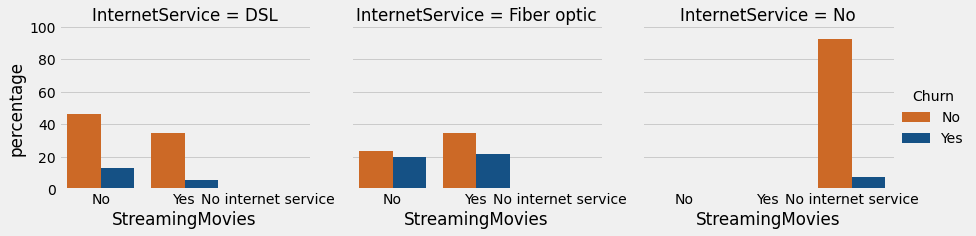

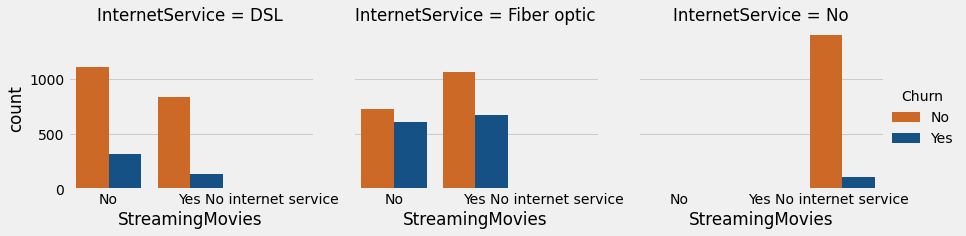

In [84]:
ax = sns.catplot(
    x="StreamingMovies", y="percentage",
    hue="Churn", col="InternetService",
    data=streaming_movies, kind="bar", palette=palette, height=3.5, aspect=1.2
)
plt.yticks(range(0, 120, 20))

ax = sns.catplot(
    x="StreamingMovies", y="count",
    hue="Churn", col="InternetService",
    data=streaming_movies, kind="bar", palette=palette, height=3.5, aspect=1.2
)

plt.show()

**Streaming Movies**

- Dari total pelanggan yang tidak menggunakan layanan internet dan streaming movies, hanya 7% yang melakukan churn.
- Dari total pelanggan yang menggunakan layanan internet DSL:
	- Sekitar 19% pelanggan churn. 13% kontribusi dari pelanggan yang tidak menggunakan streaming movies, dan 6% kontribusi dari pelanggan yang menggunakan streaming movies.
- Dari total pelanggan yang menggunakan layanan internet fiber optic :
	- Sekitar 42% pelanggan churn. 20% kontribusi dari pelanggan yang tidak menggunakan streaming movies, dan 22% kontribusi dari pelanggan yang menggunakan streaming movies.

## Target Variable

Mengecek disribusi variable target

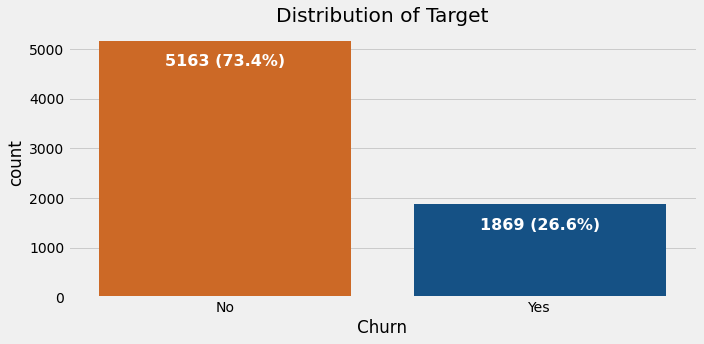

In [85]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(
    x = df["Churn"], palette = palette
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

Distribusi variabel target cukup imbalance. Pelanggan yang melakukan churn adalah sekitar 1/4 dari total pelanggan.

# Data Preprocessing

## Rename Values

Rename nilai dalam fitur kategoris karena kita akan menggunakan nilai sebagai variabel dummy. Langkah ini diperlukan untuk mendapatkan nama variabel yang mirip dengan variabel lainnya.

In [86]:
df['MultipleLines'] = df['MultipleLines'].str.lower().str.replace(' ', '_')
df['InternetService'] = df['InternetService'].str.lower().str.replace(' ', '_')
df['OnlineSecurity'] = df['OnlineSecurity'].str.lower().str.replace(' ', '_')
df['OnlineBackup'] = df['OnlineBackup'].str.lower().str.replace(' ', '_')
df['DeviceProtection'] = df['DeviceProtection'].str.lower().str.replace(' ', '_')
df['TechSupport'] = df['TechSupport'].str.lower().str.replace(' ', '_')
df['StreamingTV'] = df['StreamingTV'].str.lower().str.replace(' ', '_')
df['StreamingMovies'] = df['StreamingMovies'].str.lower().str.replace(' ', '_')
df['Contract'] = df['Contract'].str.lower().str.replace(' ', '_')
df['PaymentMethod'] = df['PaymentMethod'].str.lower().str.replace(' ', '_')

df['Contract'] = df['Contract'].str.replace('-', '_', regex=False)
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(', '', regex=False)
df['PaymentMethod'] = df['PaymentMethod'].str.replace(')', '', regex=False)

In [87]:
df.select_dtypes(object).head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,no_phone_service,dsl,no,yes,no,no,no,no,month_to_month,Yes,electronic_check,No
1,5575-GNVDE,Male,No,No,Yes,no,dsl,yes,no,yes,no,no,no,one_year,No,mailed_check,No
2,3668-QPYBK,Male,No,No,Yes,no,dsl,yes,yes,no,no,no,no,month_to_month,Yes,mailed_check,Yes
3,7795-CFOCW,Male,No,No,No,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,No,bank_transfer_automatic,No
4,9237-HQITU,Female,No,No,Yes,no,fiber_optic,no,no,no,no,no,no,month_to_month,Yes,electronic_check,Yes


## Target Variable

Mengonversi variabel target dari tipe data objek ke tipe data numerik.

In [88]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [89]:
df['Churn'] = np.where(df['Churn'] == "Yes", 1, 0)

In [90]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Feature Selection

Mendrop unique identifier column.

In [91]:
df.drop(columns=['customerID'], inplace=True)

Mengecek multicollinearity.

In [92]:
highly_correlated

,tenure,MonthlyCharges
TotalCharges,0.826,0.651


In [93]:
df_features = df.drop(columns=["Churn"])

In [94]:
vif = pd.DataFrame()
vif["features"] = df_features.select_dtypes("number").columns
vif["VIF"] = [variance_inflation_factor(df_features.select_dtypes("number").values, i) for i in range(len(vif))]
vif

,features,VIF
0,SeniorCitizen,1.257569
1,tenure,6.332737
2,MonthlyCharges,3.701617
3,TotalCharges,8.085198


Secara umum, VIF di atas 10 menunjukkan korelasi tinggi dan perlu dikhawatirkan.

Tidak ada fitur yang berkorelasi tinggi menurut skor VIF. 

## Feature Extraction

Berdasarkan analisis sebelumnya, phone service sudah memiliki fitur yang menunjukkan apakah pelanggan menggunakan phone service atau tidak. Namun untuk Internet Service, tidak ada fitur yang secara langsung mewakili informasi serupa, hanya fitur InternetService yang menginformasikan jenis Internet Service. Oleh karena itu, saya akan membuat fitur baru untuk Internet Service.

In [95]:
# rename the old internet service column
df.rename(columns={'InternetService':'InternetServiceType'}, inplace=True)

In [96]:
df['InternetServiceType'].value_counts()

fiber_optic    3096
dsl            2416
no             1520
Name: InternetServiceType, dtype: int64

In [97]:
df['InternetServiceType'] = np.where(
    df['InternetServiceType'] == 'no', 'no_internet_service', np.where(
        df['InternetServiceType'] == 'dsl', 'dsl', 'fiber_optic'
    )
)

In [98]:
df['InternetServiceType'].value_counts()

fiber_optic            3096
dsl                    2416
no_internet_service    1520
Name: InternetServiceType, dtype: int64

In [99]:
df['InternetService'] = np.where(
    df['InternetServiceType'] == 'no_internet_service', 'No', 'Yes'
)

In [100]:
df['InternetService'].value_counts()

Yes    5512
No     1520
Name: InternetService, dtype: int64

In [101]:
print(df.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetServiceType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService']


In [102]:
# arange the features
df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'InternetServiceType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

## Feature Encoding

Kita akan melakukan OHE untuk semua fitur kategorikal yang belum diencod. Penggunaan one-hot encoding karena informasi yang terdapat dalam semua variabel kategoris tidak memiliki urutan, yang disebut sebagai variabel kategorik nominal. Karena tidak memiliki urutan, label encoding bukanlah pilihan terbaik untuk digunakan. Jadi, kita akan menggunakan OHE

In [103]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,no_phone_service,Yes,dsl,no,yes,no,no,no,no,month_to_month,Yes,electronic_check,29.85,29.85,0
1,Male,0,No,No,34,Yes,no,Yes,dsl,yes,no,yes,no,no,no,one_year,No,mailed_check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,no,Yes,dsl,yes,yes,no,no,no,no,month_to_month,Yes,mailed_check,53.85,108.15,1
3,Male,0,No,No,45,No,no_phone_service,Yes,dsl,yes,no,yes,yes,no,no,one_year,No,bank_transfer_automatic,42.30,1840.75,0
4,Female,0,No,No,2,Yes,no,Yes,fiber_optic,no,no,no,no,no,no,month_to_month,Yes,electronic_check,70.70,151.65,1


In [104]:
categorical_colomns = df.select_dtypes('object').columns.tolist()

In [105]:
for i in range(len(categorical_colomns)):
    df[categorical_colomns[i]] = df[categorical_colomns[i]].str.lower()

In [106]:
print(df.shape)
df[categorical_colomns].head()

(7032, 21)


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,female,yes,no,no,no_phone_service,yes,dsl,no,yes,no,no,no,no,month_to_month,yes,electronic_check
1,male,no,no,yes,no,yes,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check
2,male,no,no,yes,no,yes,dsl,yes,yes,no,no,no,no,month_to_month,yes,mailed_check
3,male,no,no,no,no_phone_service,yes,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_automatic
4,female,no,no,yes,no,yes,fiber_optic,no,no,no,no,no,no,month_to_month,yes,electronic_check


**One Hot Encoding**

In [107]:
for i in range(len(categorical_colomns)):
    dummies = pd.get_dummies(df[categorical_colomns[i]], prefix = categorical_colomns[i], drop_first=True)
    df = pd.concat([df, dummies], axis = 1)
    
df.drop(columns = categorical_colomns, inplace = True)

In [108]:
print(df.shape)
df.head()

(7032, 32)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no_phone_service,MultipleLines_yes,InternetService_yes,InternetServiceType_fiber_optic,InternetServiceType_no_internet_service,OnlineSecurity_no_internet_service,OnlineSecurity_yes,OnlineBackup_no_internet_service,OnlineBackup_yes,DeviceProtection_no_internet_service,DeviceProtection_yes,TechSupport_no_internet_service,TechSupport_yes,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_one_year,Contract_two_year,PaperlessBilling_yes,PaymentMethod_credit_card_automatic,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [109]:
no_internet_service = df.columns[df.columns.str.contains('no_internet_service')].tolist()
print(no_internet_service)

['InternetServiceType_no_internet_service', 'OnlineSecurity_no_internet_service', 'OnlineBackup_no_internet_service', 'DeviceProtection_no_internet_service', 'TechSupport_no_internet_service', 'StreamingTV_no_internet_service', 'StreamingMovies_no_internet_service']


In [110]:
df.shape[0]

7032

In [111]:
(
    (df['InternetServiceType_no_internet_service'] == df['OnlineSecurity_no_internet_service']) &
    (df['InternetServiceType_no_internet_service'] == df['OnlineBackup_no_internet_service']) &
    (df['InternetServiceType_no_internet_service'] == df['DeviceProtection_no_internet_service']) &
    (df['InternetServiceType_no_internet_service'] == df['TechSupport_no_internet_service']) &
    (df['InternetServiceType_no_internet_service'] == df['StreamingTV_no_internet_service']) &
    (df['InternetServiceType_no_internet_service'] == df['StreamingMovies_no_internet_service'])
).value_counts()

True    7032
dtype: int64

In [112]:
df.drop(columns=no_internet_service[1:], inplace = True)

In [113]:
print(df.shape)
df.head()

(7032, 26)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no_phone_service,MultipleLines_yes,InternetService_yes,InternetServiceType_fiber_optic,InternetServiceType_no_internet_service,OnlineSecurity_yes,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one_year,Contract_two_year,PaperlessBilling_yes,PaymentMethod_credit_card_automatic,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0


## Split Dataset

Kita akan membagi dataset menjadi 3 bagian: 70% train set, 20% validation set, dan 10% test set.

In [114]:
np.random.seed(42)

In [115]:
# arange the columns to prepare for model inference and deployment
df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'gender_male', 'Partner_yes', 'Dependents_yes', 'PhoneService_yes', 'MultipleLines_no_phone_service', 'MultipleLines_yes', 'InternetService_yes', 'InternetServiceType_fiber_optic', 'InternetServiceType_no_internet_service', 'OnlineSecurity_yes', 'OnlineBackup_yes', 'DeviceProtection_yes', 'TechSupport_yes', 'StreamingTV_yes', 'StreamingMovies_yes', 'Contract_one_year', 'Contract_two_year', 'PaperlessBilling_yes', 'PaymentMethod_credit_card_automatic', 'PaymentMethod_electronic_check', 'PaymentMethod_mailed_check']]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int32  
 4   SeniorCitizen                            7032 non-null   int64  
 5   gender_male                              7032 non-null   uint8  
 6   Partner_yes                              7032 non-null   uint8  
 7   Dependents_yes                           7032 non-null   uint8  
 8   PhoneService_yes                         7032 non-null   uint8  
 9   MultipleLines_no_phone_service           7032 non-null   uint8  
 10  MultipleLines_yes                        7032 no

Menentukan fitur dan variabel target ke dalam variabel terpisah.

In [117]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [118]:
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no_phone_service,MultipleLines_yes,InternetService_yes,InternetServiceType_fiber_optic,InternetServiceType_no_internet_service,OnlineSecurity_yes,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,Contract_one_year,Contract_two_year,PaperlessBilling_yes,PaymentMethod_credit_card_automatic,PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [119]:
X_, X_test, y_, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, stratify = y_, random_state = 42, test_size = 2/9)

In [120]:
len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X)

(0.6998009101251422, 0.20008532423208192, 0.10011376564277588)

## Features Scaling

Feature Scaling akan diintegrasikan ke dalam pipeline. Scaling akan menggunakan StandardScaler oleh sklearn.

## Target Variable Sampling (Reduce Class Imbalance)

Karena imbalanced class, kita perlu menyeimbangkan kelas di train set untuk membuat model lebih baik. Ini akan dilakukan dengan menggunakan metode oversampling dengan SMOTE.

In [121]:
print(f"Class 0 percentage: {round(y_train.value_counts()[0]/len(y_train), 4)}")
print(f"Class 1 percentage: {round(y_train.value_counts()[1]/len(y_train), 4)}")

Class 0 percentage: 0.7342
Class 1 percentage: 0.2658


## Input Pipeline

In [122]:
input_pipeline = Pipeline(steps=[
    ['scaler', StandardScaler()],
], memory="cache_folder")

Fit hanya untuk training set dan transform untuk semua sets.

In [123]:
input_pipeline.fit(X_train)

X_train_trf = input_pipeline.transform(X_train)
X_val_trf = input_pipeline.transform(X_val)
X_test_trf = input_pipeline.transform(X_test)

# Define Model

In [124]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Tentukan metrik yang akan digunakan untuk mengevaluasi model.

In [125]:
metrics_list = [
    keras.metrics.AUC(name='auc'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Recall(name='recall')
]

## Sequential API

Pada Sequential API, kita akan menggunakan glorot normal initializer sebagai default kernel initializer untuk setiap hidden layer dan ReLU sebagai fungsi aktivasi.

Neural network ini terdiri dari:
1 input layer dengan jumlah fitur sebagai input shape, 3 Hidden layer yang memiliki jumlah neuron yang berbeda (50, 20, 10), dan 1 output layer yang memiliki fungsi aktivasi sigmoid karena masalahnya adalah binary classification.

Referensi: https://keras.io/api/layers/initializers/

In [126]:
def sequential_api(inputs_shape=X_train.shape[1:], initializer=initializers.GlorotNormal(), hidden_activation_func='relu'):
    sequential_model = Sequential([
        Dense(50, activation=hidden_activation_func, kernel_initializer=initializer, input_shape=inputs_shape),
        Dense(20, activation=hidden_activation_func, kernel_initializer=initializer),
        Dense(10, activation=hidden_activation_func, kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])
    
    return sequential_model

In [127]:
sequential_model = sequential_api(inputs_shape=X_train_trf.shape[1:])
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


Untuk optimizer, neural network ini akan menggunakan Adam optimizer. Sedangkan untuk fungsi loss, kita akan menggunakan binary cross-entropy karena ini adalah masalah binary classification.

In [128]:
sequential_model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

## Functional API

Pada functional API, kita akan menggunakan initializer dan activation function yang sama dengan Sequential API.


In [129]:
def functional_api(inputs_shape=X_train.shape[1:], initializer=initializers.GlorotNormal(), hidden_activation_func='relu'):
    input_ = Input(shape=inputs_shape)
    hidden1 = Dense(50, activation=hidden_activation_func, kernel_initializer=initializer)(input_)
    hidden2 = Dense(20, activation=hidden_activation_func, kernel_initializer=initializer)(hidden1)
    hidden3 = Dense(10, activation=hidden_activation_func, kernel_initializer=initializer)(hidden2)
    concat = concatenate([input_, hidden3])
    output = Dense(1, activation='sigmoid')(concat)
    functional_model = Model(inputs=[input_], outputs=[output])
    
    return functional_model

In [130]:
functional_model = functional_api(inputs_shape=X_train_trf.shape[1:])
functional_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 50)           1300        ['input_1[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 20)           1020        ['dense_4[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 10)           210         ['dense_5[0][0]']                
                                                                                              

In [131]:
functional_model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

# Model Training

Kita akan menyimpan/save models history.

In [132]:
model_history = {}

We will try to train the model in a small epoch.

In [133]:
epoch = 20

## Sequential API

Training modelnya dengan epoch yang kecil: 20.
Kita hanya akan menyimpan model terbaik saja.

In [134]:
base_sequential_cb = ModelCheckpoint("model/base_sequential_model.h5", save_best_only=True)

model_history['Sequential API'] = sequential_model.fit(
    X_train_trf, y_train, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_sequential_cb]
).history

Epoch 1/20
154/154 [==============================] - 2s 7ms/step - loss: 0.5046 - auc: 0.7483 - accuracy: 0.7431 - recall: 0.3089 - val_loss: 0.4478 - val_auc: 0.8168 - val_accuracy: 0.7925 - val_recall: 0.5214
Epoch 2/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4213 - auc: 0.8417 - accuracy: 0.7964 - recall: 0.5512 - val_loss: 0.4392 - val_auc: 0.8262 - val_accuracy: 0.7974 - val_recall: 0.5695
Epoch 3/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4099 - auc: 0.8515 - accuracy: 0.8082 - recall: 0.5657 - val_loss: 0.4355 - val_auc: 0.8310 - val_accuracy: 0.7960 - val_recall: 0.5321
Epoch 4/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4042 - auc: 0.8562 - accuracy: 0.8080 - recall: 0.5627 - val_loss: 0.4372 - val_auc: 0.8306 - val_accuracy: 0.8053 - val_recall: 0.5053
Epoch 5/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4002 - auc: 0.8593 - accuracy: 0.8137 - recall: 0.5642 - val_loss: 0.4316 - 

Load  model untuk analysis:

In [135]:
base_sequential_model = keras.models.load_model("model/base_sequential_model.h5") # rollback to best model

## Functional API

Training model epoch: 20.

In [136]:
base_functional_cb = ModelCheckpoint("model/base_functional_model.h5", save_best_only=True)

model_history['Functional API'] = functional_model.fit(
    X_train_trf, y_train, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_functional_cb]
).history

Epoch 1/20
154/154 [==============================] - 2s 5ms/step - loss: 0.5471 - auc: 0.7354 - accuracy: 0.7233 - recall: 0.3769 - val_loss: 0.4629 - val_auc: 0.8080 - val_accuracy: 0.7647 - val_recall: 0.4037
Epoch 2/20
154/154 [==============================] - 0s 2ms/step - loss: 0.4225 - auc: 0.8407 - accuracy: 0.7933 - recall: 0.5122 - val_loss: 0.4475 - val_auc: 0.8206 - val_accuracy: 0.7854 - val_recall: 0.5214
Epoch 3/20
154/154 [==============================] - 0s 2ms/step - loss: 0.4108 - auc: 0.8503 - accuracy: 0.8043 - recall: 0.5528 - val_loss: 0.4402 - val_auc: 0.8278 - val_accuracy: 0.7882 - val_recall: 0.5107
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 0.4033 - auc: 0.8566 - accuracy: 0.8104 - recall: 0.5734 - val_loss: 0.4422 - val_auc: 0.8280 - val_accuracy: 0.7946 - val_recall: 0.5053
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 0.4000 - auc: 0.8594 - accuracy: 0.8120 - recall: 0.5673 - val_loss: 0.4343 - 

Load model untul analysis:

In [137]:
base_functional_model = keras.models.load_model("model/base_functional_model.h5") # rollback to best model

# Model Evaluation

Saving history kedalam dataframe untuk setiap model.

In [138]:
for model_name, model_history in model_history.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1, epoch+1)))

## Evaluation per Epoch

Plot models performance dalam setiap epoch.

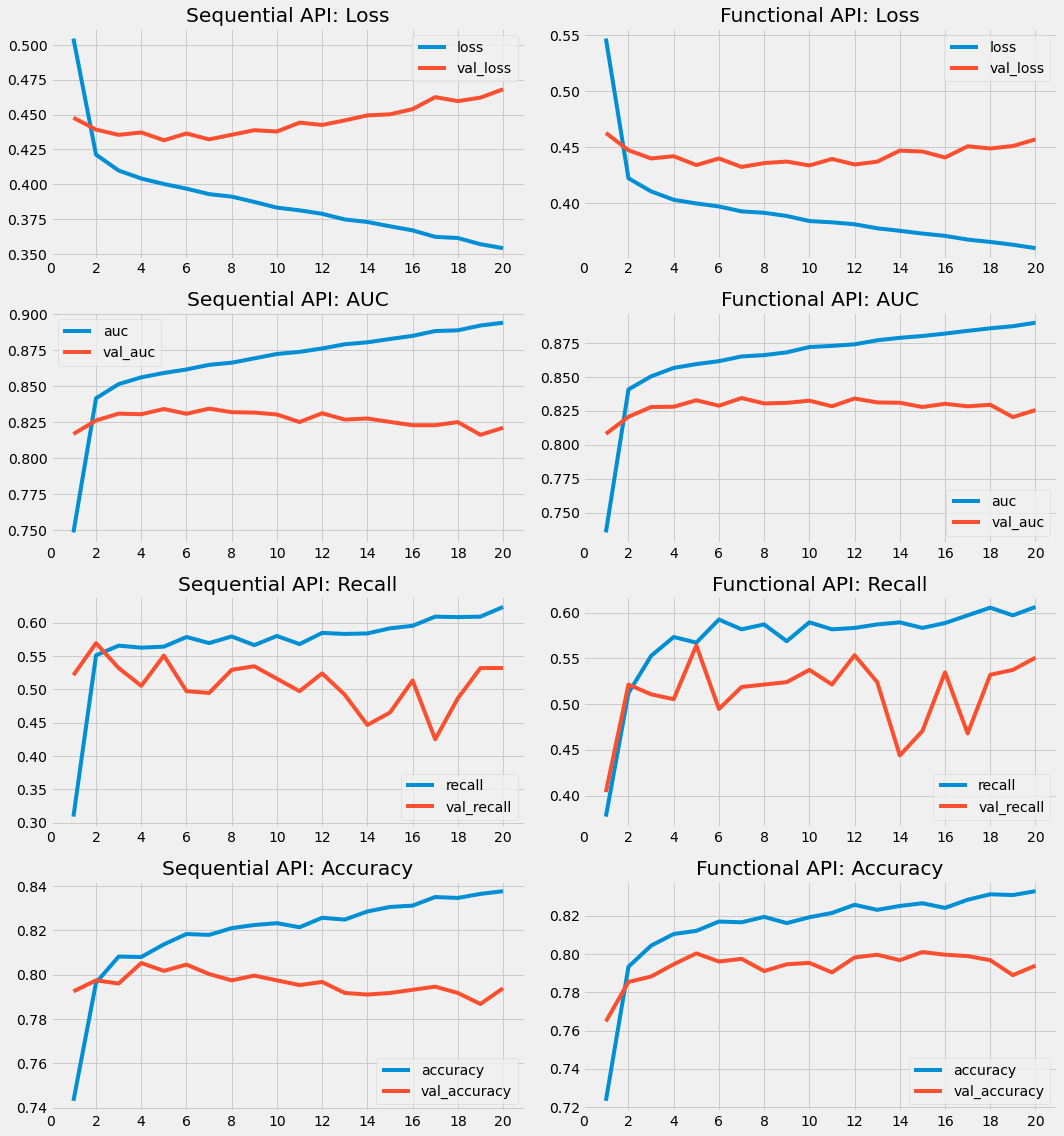

In [139]:
fig, axes = plt.subplots(4, 2, figsize = (15, 16))
xticks = range(0,22,2)
sequential_api_df[["loss", "val_loss"]].plot.line(title='Sequential API: Loss', ax=axes[0,0])
axes[0,0].set_xticks(xticks)
functional_api_df[["loss", "val_loss"]].plot.line(title='Functional API: Loss', ax=axes[0,1])
axes[0,1].set_xticks(xticks)

sequential_api_df[["auc", "val_auc"]].plot.line(title='Sequential API: AUC', ax=axes[1,0])
axes[1,0].set_xticks(xticks)
functional_api_df[["auc", "val_auc"]].plot.line(title='Functional API: AUC', ax=axes[1,1])
axes[1,1].set_xticks(xticks)

sequential_api_df[["recall", "val_recall"]].plot.line(title='Sequential API: Recall', ax=axes[2,0])
axes[2,0].set_xticks(xticks)
functional_api_df[["recall", "val_recall"]].plot.line(title='Functional API: Recall', ax=axes[2,1])
axes[2,1].set_xticks(xticks)

sequential_api_df[["accuracy", "val_accuracy"]].plot.line(title='Sequential API: Accuracy', ax=axes[3,0])
axes[3,0].set_xticks(xticks)
functional_api_df[["accuracy", "val_accuracy"]].plot.line(title='Functional API: Accuracy', ax=axes[3,1])
axes[3,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

**Base Model**

- Cross-entropy loss dari sequential API terlihat mirip dengan functional API. Perbedaan loss training dan set validasi cukup jauh, sedangkan loss training set cenderung menurun seiring bertambahnya epoch, loss pada set validasi cenderung meningkat. Ini menunjukkan beberapa masalah overfitting.
- AUC pada sequential API dalam training set cenderung lebih besar daripada AUC functional API seiring bertambahnya epochs. Sementara sequential API dapat mencapai sekitar 90%, fungsionalnya sedikit lebih kecil yaitu sekitar 87,5%. Meski begitu, set validasi terlihat mirip.
- Recall tiap epoch cenderung fluktuatif, hal ini terjadi pada kedua model. Meskipun AUC menunjukkan skor yang baik, recallnya masih buruk, hanya mencapai 60% pada kedua model. 
- Untuk akurasi, karena ini adalah masalah imbalanced class, kita akan lebih fokus mengevaluasi metrik yang tepat yaitu AUC.

In [140]:
model_evaluation = pd.concat([sequential_api_df.add_prefix('sequential '), functional_api_df.add_prefix('functional ')], axis=1)

color_dict = {
    'sequential loss':'#4169e1', 'sequential val_loss':'#89CFF0',
    'sequential auc':'#4169e1', 'sequential val_auc':'#89CFF0',
    'sequential recall':'#4169e1', 'sequential val_recall':'#89CFF0',
    'sequential accuracy':'#4169e1', 'sequential val_accuracy':'#89CFF0',
    'functional loss':'#FFA500', 'functional val_loss':'#E97451',
    'functional auc':'#FFA500', 'functional val_auc':'#E97451',
    'functional recall':'#FFA500', 'functional val_recall':'#E97451',
    'functional accuracy':'#FFA500', 'functional val_accuracy':'#E97451'
}

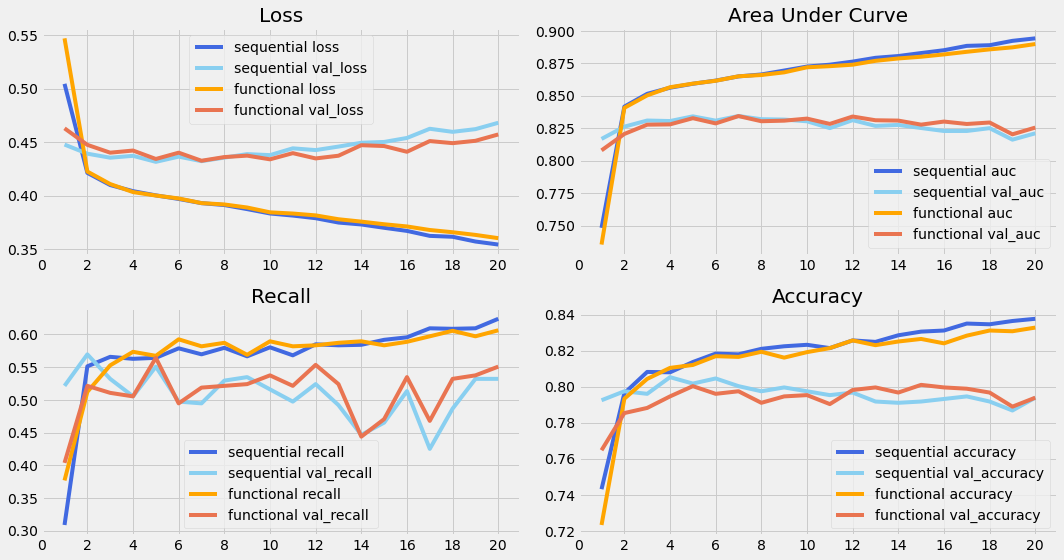

In [141]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
xticks = range(0,22,2)
model_evaluation[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].plot.line(
    title='Loss', ax=axes[0,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].columns]
)
axes[0,0].set_xticks(xticks)
model_evaluation[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].plot.line(
    title='Area Under Curve', ax=axes[0,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].columns]
)
axes[0,1].set_xticks(xticks)

model_evaluation[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].plot.line(
    title='Recall', ax=axes[1,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].columns]
)
axes[1,0].set_xticks(xticks)
model_evaluation[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].plot.line(
    title='Accuracy', ax=axes[1,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].columns]
)
axes[1,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

Dari plot di atas, kita dapat melihat bahwa kedua model memiliki skor yang sangat dekat untuk setiap epoch dari setiap metrik evaluasi. Perbedaan yang terlihat hanya pada skor Recall, dimana recall validasi fungsional cenderung lebih besar pada epoch > 16.

## Evaluation of Base Model with Best Score

**Sequential API**

In [142]:
base_sequential_test = base_sequential_model.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.4486 - auc: 0.8161 - accuracy: 0.7770 - recall: 0.5348


In [143]:
y_proba_base_sequential = base_sequential_model.predict(X_test_trf)
y_pred_base_sequential = np.where(y_proba_base_sequential>0.5, 1, 0)

In [144]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_sequential,digits=4)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_base_sequential)}")

auc_sequential_base = tf.keras.metrics.AUC()
auc_sequential_base.update_state(y_test, y_proba_base_sequential)
print(f"\nAUC: {auc_sequential_base.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8371    0.8646    0.8506       517
           1     0.5882    0.5348    0.5602       187

    accuracy                         0.7770       704
   macro avg     0.7127    0.6997    0.7054       704
weighted avg     0.7710    0.7770    0.7735       704

Confusion Matrix:
[[447  70]
 [ 87 100]]

AUC: 0.8161027431488037


**Functional API**

In [145]:
base_functional_test = base_functional_model.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.4433 - auc: 0.8203 - accuracy: 0.7869 - recall: 0.5134


In [146]:
y_proba_base_functional = base_functional_model.predict(X_test_trf)
y_pred_base_functional = np.where(y_proba_base_functional>0.5, 1, 0)

In [147]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_functional,digits=4)}")
print(f"Confusion Matrx:\n{confusion_matrix(y_test, y_pred_base_functional)}")

auc_functional_base = tf.keras.metrics.AUC()
auc_functional_base.update_state(y_test, y_proba_base_functional)
print(f"\nAUC: {auc_functional_base.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8342    0.8859    0.8593       517
           1     0.6194    0.5134    0.5614       187

    accuracy                         0.7869       704
   macro avg     0.7268    0.6996    0.7103       704
weighted avg     0.7772    0.7869    0.7802       704

Confusion Matrx:
[[458  59]
 [ 91  96]]

AUC: 0.8203022480010986


- AUC di functional API lebih besar dari sequential API. Tetapi recall di functional API lebih kecil dari sequential API.
- Sequential API memiliki False Negatives lebih sedikit dibandingkan functional API, tetapi False Positives lebih besar. Ini berarti bahwa sequential API dapat memprediksi lebih banyak pelanggan yang kemungkinan besar akan melakukan churn, tetapi presisi prediksinya kurang dari functional API.

# Model Improvement

Sebelum melakukan tuning hyperparameter, kita akan mencoba menggunakan metode sampling untuk meningkatkan performa model.

## Oversampling SMOTE

In [148]:
y_train.value_counts()

0    3613
1    1308
Name: Churn, dtype: int64

In [149]:
oversampling = SMOTE(random_state=42, sampling_strategy = 'minority')
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)
X_train_oversampling_trf = input_pipeline.transform(X_train_oversampling)

In [150]:
y_train_oversampling.value_counts()

0    3613
1    3613
Name: Churn, dtype: int64

In [151]:
model_history_oversampling = {}

**Sequential API**

In [152]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [153]:
sequential_model_oversampling = sequential_api(inputs_shape=X_train_oversampling_trf.shape[1:])
sequential_model_oversampling.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


In [154]:
sequential_model_oversampling.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

In [155]:
base_sequential_oversampling_cb = ModelCheckpoint("model/base_sequential_model_oversampling.h5", save_best_only=True)

model_history_oversampling['Sequential API'] = sequential_model_oversampling.fit(
    X_train_oversampling_trf, y_train_oversampling, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_sequential_oversampling_cb]
).history

Epoch 1/20
226/226 [==============================] - 2s 3ms/step - loss: 0.4705 - auc: 0.8617 - accuracy: 0.7791 - recall: 0.8144 - val_loss: 0.4857 - val_auc: 0.8061 - val_accuracy: 0.7804 - val_recall: 0.6364
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3875 - auc: 0.9064 - accuracy: 0.8259 - recall: 0.8381 - val_loss: 0.4890 - val_auc: 0.8086 - val_accuracy: 0.7704 - val_recall: 0.6230
Epoch 3/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3723 - auc: 0.9137 - accuracy: 0.8337 - recall: 0.8422 - val_loss: 0.4794 - val_auc: 0.8117 - val_accuracy: 0.7676 - val_recall: 0.5909
Epoch 4/20
226/226 [==============================] - 1s 3ms/step - loss: 0.3636 - auc: 0.9177 - accuracy: 0.8363 - recall: 0.8417 - val_loss: 0.4856 - val_auc: 0.8157 - val_accuracy: 0.7626 - val_recall: 0.6123
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3544 - auc: 0.9221 - accuracy: 0.8427 - recall: 0.8436 - val_loss: 0.4709 - 

In [156]:
base_sequential_model_oversampling = keras.models.load_model("model/base_sequential_model_oversampling.h5") # rollback to best model

**Functional API**

In [157]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [158]:
functional_model_oversampling = functional_api(inputs_shape=X_train_oversampling_trf.shape[1:])
functional_model_oversampling.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 50)           1300        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           1020        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           210         ['dense_1[0][0]']                
                                                                                              

In [167]:
functional_model_oversampling.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

In [168]:
base_functional_oversampling_cb = ModelCheckpoint("model/base_functional_model_oversampling.h5", save_best_only=True)

model_history_oversampling['Functional API'] = functional_model_oversampling.fit(
    X_train_oversampling_trf, y_train_oversampling, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_functional_oversampling_cb]
).history

Epoch 1/20
226/226 [==============================] - 2s 5ms/step - loss: 0.1975 - auc: 0.9532 - accuracy: 0.8856 - recall: 0.8796 - val_loss: 0.7502 - val_auc: 0.7678 - val_accuracy: 0.7512 - val_recall: 0.5829
Epoch 2/20
226/226 [==============================] - 1s 2ms/step - loss: 0.1963 - auc: 0.9763 - accuracy: 0.9152 - recall: 0.9195 - val_loss: 0.7337 - val_auc: 0.7639 - val_accuracy: 0.7470 - val_recall: 0.5321
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.1933 - auc: 0.9771 - accuracy: 0.9139 - recall: 0.9153 - val_loss: 0.7281 - val_auc: 0.7542 - val_accuracy: 0.7420 - val_recall: 0.4626
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 0.1957 - auc: 0.9765 - accuracy: 0.9156 - recall: 0.9178 - val_loss: 0.7554 - val_auc: 0.7651 - val_accuracy: 0.7477 - val_recall: 0.5401
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.1937 - auc: 0.9768 - accuracy: 0.9167 - recall: 0.9178 - val_loss: 0.7610 - 

In [169]:
base_functional_model_oversampling = keras.models.load_model("model/base_functional_model_oversampling.h5") # rollback to best model

### Evaluation per Epoch

In [170]:
for model_name, model_history in model_history_oversampling.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_oversampling_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1, epoch+1)))

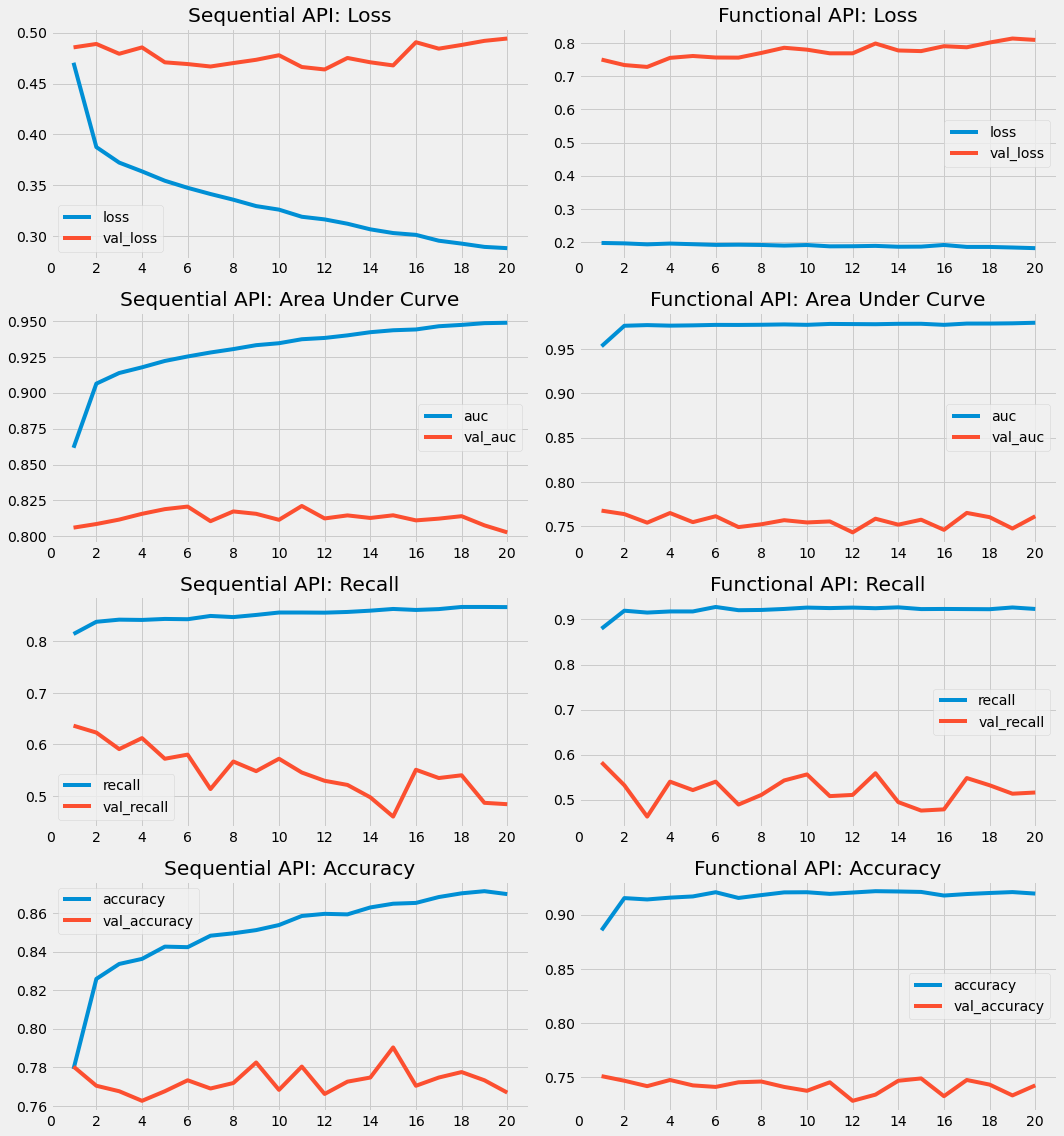

In [171]:
fig, axes = plt.subplots(4, 2, figsize = (15, 16))
xticks = range(0,22,2)
sequential_api_oversampling_df[["loss", "val_loss"]].plot.line(title='Sequential API: Loss', ax=axes[0,0])
axes[0,0].set_xticks(xticks)
functional_api_oversampling_df[["loss", "val_loss"]].plot.line(title='Functional API: Loss', ax=axes[0,1])
axes[0,1].set_xticks(xticks)

sequential_api_oversampling_df[["auc", "val_auc"]].plot.line(title='Sequential API: Area Under Curve', ax=axes[1,0])
axes[1,0].set_xticks(xticks)
functional_api_oversampling_df[["auc", "val_auc"]].plot.line(title='Functional API: Area Under Curve', ax=axes[1,1])
axes[1,1].set_xticks(xticks)

sequential_api_oversampling_df[["recall", "val_recall"]].plot.line(title='Sequential API: Recall', ax=axes[2,0])
axes[2,0].set_xticks(xticks)
functional_api_oversampling_df[["recall", "val_recall"]].plot.line(title='Functional API: Recall', ax=axes[2,1])
axes[2,1].set_xticks(xticks)

sequential_api_oversampling_df[["accuracy", "val_accuracy"]].plot.line(title='Sequential API: Accuracy', ax=axes[3,0])
axes[3,0].set_xticks(xticks)
functional_api_oversampling_df[["accuracy", "val_accuracy"]].plot.line(title='Functional API: Accuracy', ax=axes[3,1])
axes[3,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

**Oversampling Training Set**

Setelah oversampling, kedua model kinerjanya meningkat di train set, tetapi masih buruk di set validasi yang berarti model memiliki varians yang tinggi pada train set dan dengan demikian membuat mereka mempelajari noises yang memberikan masalah overfitting. 

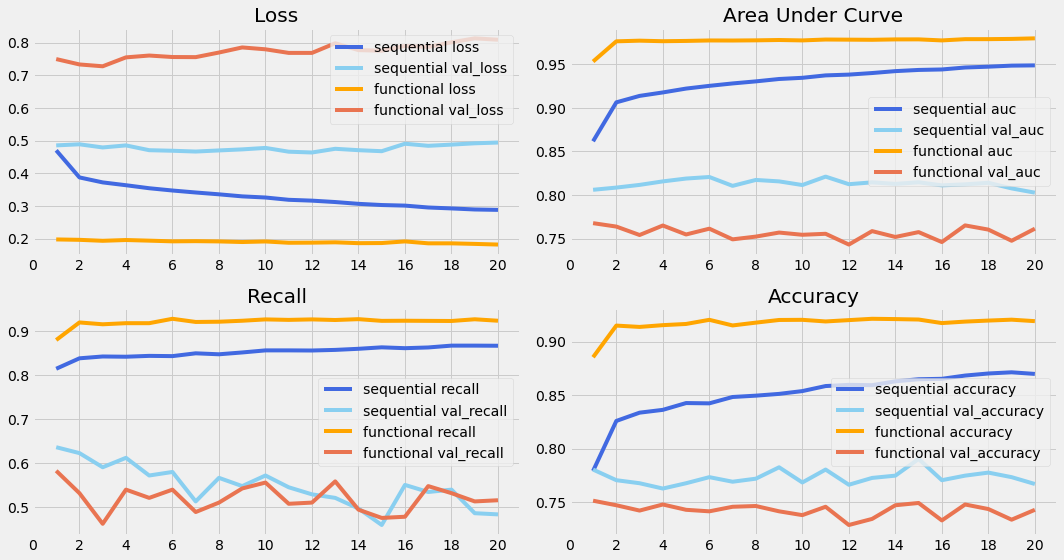

In [172]:
# concat the evaluation metrics to plot them in the same grid
model_evaluation_oversampling = pd.concat([sequential_api_oversampling_df.add_prefix('sequential '), functional_api_oversampling_df.add_prefix('functional ')], axis=1)

fig, axes = plt.subplots(2, 2, figsize = (15, 8))
xticks = range(0,22,2)
model_evaluation_oversampling[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].plot.line(
    title='Loss', ax=axes[0,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].columns]
)
axes[0,0].set_xticks(xticks)
model_evaluation_oversampling[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].plot.line(
    title='Area Under Curve', ax=axes[0,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].columns]
)
axes[0,1].set_xticks(xticks)

model_evaluation_oversampling[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].plot.line(
    title='Recall', ax=axes[1,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].columns]
)
axes[1,0].set_xticks(xticks)
model_evaluation_oversampling[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].plot.line(
    title='Accuracy', ax=axes[1,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].columns]
)
axes[1,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

### Evaluation of Base Model with Best Score

**Sequential API**

In [173]:
base_sequential_oversampling_test = base_sequential_model_oversampling.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.4704 - auc: 0.8091 - accuracy: 0.7599 - recall: 0.5615


In [174]:
y_proba_base_sequential_oversampling = base_sequential_model_oversampling.predict(X_test_trf)
y_pred_base_sequential_oversampling = np.where(y_proba_base_sequential_oversampling>0.5, 1, 0)

In [175]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_sequential_oversampling,digits=4)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_base_sequential_oversampling)}")

auc_sequential_base_oversampling = tf.keras.metrics.AUC()
auc_sequential_base_oversampling.update_state(y_test, y_proba_base_sequential_oversampling)
print(f"\nAUC: {auc_sequential_base_oversampling.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8398    0.8317    0.8358       517
           1     0.5469    0.5615    0.5541       187

    accuracy                         0.7599       704
   macro avg     0.6934    0.6966    0.6949       704
weighted avg     0.7620    0.7599    0.7609       704

Confusion Matrix:
[[430  87]
 [ 82 105]]

AUC: 0.8090847134590149


**Functional API**

In [182]:
base_functional_oversampling_test = base_functional_model_oversampling.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.7170 - auc: 0.7596 - accuracy: 0.7543 - recall: 0.4920


In [177]:
y_proba_base_functional_oversampling = base_functional_model_oversampling.predict(X_test_trf)
y_pred_base_functional_oversampling = np.where(y_proba_base_functional_oversampling>0.5, 1, 0)

In [183]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_functional_oversampling,digits=4)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_base_functional_oversampling)}")

auc_functional_base_oversampling = tf.keras.metrics.AUC()
auc_functional_base_oversampling.update_state(y_test, y_proba_base_functional_oversampling)
print(f"\nAUC: {auc_functional_base_oversampling.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8221    0.8491    0.8354       517
           1     0.5412    0.4920    0.5154       187

    accuracy                         0.7543       704
   macro avg     0.6816    0.6706    0.6754       704
weighted avg     0.7475    0.7543    0.7504       704

Confusion Matrix:
[[439  78]
 [ 95  92]]

AUC: 0.7595857977867126


- AUC di sequential API lebih besar dripaada di functional API. 


## Undersampling using RandomUnderSampler

Metode undersampling akan menggunakan Random Under Sampler dengan strategi sampling untuk mengurangi mayoritas sampai memiliki jumlah sampel yang sama dengan kelas minoritas.

In [184]:
y_train.value_counts()

0    3613
1    1308
Name: Churn, dtype: int64

In [185]:
undersampling = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X_train_undersampling, y_train_undersampling = undersampling.fit_resample(X_train, y_train)
X_train_undersampling_trf = input_pipeline.transform(X_train_undersampling)

In [186]:
y_train_undersampling.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [187]:
model_history_undersampling = {}

**Sequential API**

In [188]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [189]:
sequential_model_undersampling = sequential_api(inputs_shape=X_train_undersampling_trf.shape[1:])
sequential_model_undersampling.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


In [190]:
sequential_model_undersampling.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

In [191]:
base_sequential_undersampling_cb = ModelCheckpoint("model/base_sequential_model_undersampling.h5", save_best_only=True)

model_history_undersampling['Sequential API'] = sequential_model_undersampling.fit(
    X_train_undersampling_trf, y_train_undersampling, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_sequential_undersampling_cb]
).history

Epoch 1/20
82/82 [==============================] - 2s 11ms/step - loss: 0.5930 - auc: 0.7742 - accuracy: 0.7114 - recall: 0.7693 - val_loss: 0.5221 - val_auc: 0.8121 - val_accuracy: 0.7690 - val_recall: 0.7139
Epoch 2/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4849 - auc: 0.8483 - accuracy: 0.7630 - recall: 0.7599 - val_loss: 0.5076 - val_auc: 0.8256 - val_accuracy: 0.7619 - val_recall: 0.7540
Epoch 3/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4666 - auc: 0.8595 - accuracy: 0.7706 - recall: 0.7966 - val_loss: 0.4736 - val_auc: 0.8276 - val_accuracy: 0.7726 - val_recall: 0.7059
Epoch 4/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4594 - auc: 0.8640 - accuracy: 0.7775 - recall: 0.7882 - val_loss: 0.4846 - val_auc: 0.8313 - val_accuracy: 0.7626 - val_recall: 0.7380
Epoch 5/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4506 - auc: 0.8693 - accuracy: 0.7798 - recall: 0.8005 - val_loss: 0.4969 - val_auc: 

In [192]:
base_sequential_model_undersampling = keras.models.load_model("model/base_sequential_model_undersampling.h5") # rollback to best model

**Functional API**

In [193]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [194]:
functional_model_undersampling = functional_api(inputs_shape=X_train_undersampling_trf.shape[1:])
functional_model_undersampling.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 50)           1300        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 20)           1020        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           210         ['dense_1[0][0]']                
                                                                                              

In [195]:
functional_model_undersampling.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.Adam(
        name='Adam'
    ),
    metrics=metrics_list
)

In [196]:
base_functional_undersampling_cb = ModelCheckpoint("model/base_functional_model_undersampling.h5", save_best_only=True)

model_history_undersampling['Functional API'] = functional_model_undersampling.fit(
    X_train_undersampling_trf, y_train_undersampling, epochs=epoch,
    validation_data=(X_val_trf, y_val),
    callbacks=[base_functional_undersampling_cb]
).history

Epoch 1/20
82/82 [==============================] - 2s 12ms/step - loss: 0.6999 - auc: 0.7139 - accuracy: 0.6450 - recall: 0.6938 - val_loss: 0.5440 - val_auc: 0.7862 - val_accuracy: 0.7207 - val_recall: 0.6925
Epoch 2/20
82/82 [==============================] - 0s 3ms/step - loss: 0.4946 - auc: 0.8415 - accuracy: 0.7588 - recall: 0.7852 - val_loss: 0.5143 - val_auc: 0.8201 - val_accuracy: 0.7399 - val_recall: 0.7674
Epoch 3/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4700 - auc: 0.8571 - accuracy: 0.7661 - recall: 0.8157 - val_loss: 0.4756 - val_auc: 0.8246 - val_accuracy: 0.7612 - val_recall: 0.7032
Epoch 4/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4632 - auc: 0.8606 - accuracy: 0.7680 - recall: 0.8005 - val_loss: 0.4881 - val_auc: 0.8288 - val_accuracy: 0.7591 - val_recall: 0.7513
Epoch 5/20
82/82 [==============================] - 0s 3ms/step - loss: 0.4547 - auc: 0.8664 - accuracy: 0.7810 - recall: 0.8203 - val_loss: 0.5025 - val_auc: 

In [197]:
base_functional_model_undersampling = keras.models.load_model("model/base_functional_model_undersampling.h5") # rollback to best model

### Evaluation per Epoch

In [198]:
for model_name, model_history in model_history_undersampling.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_undersampling_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1, epoch+1)))

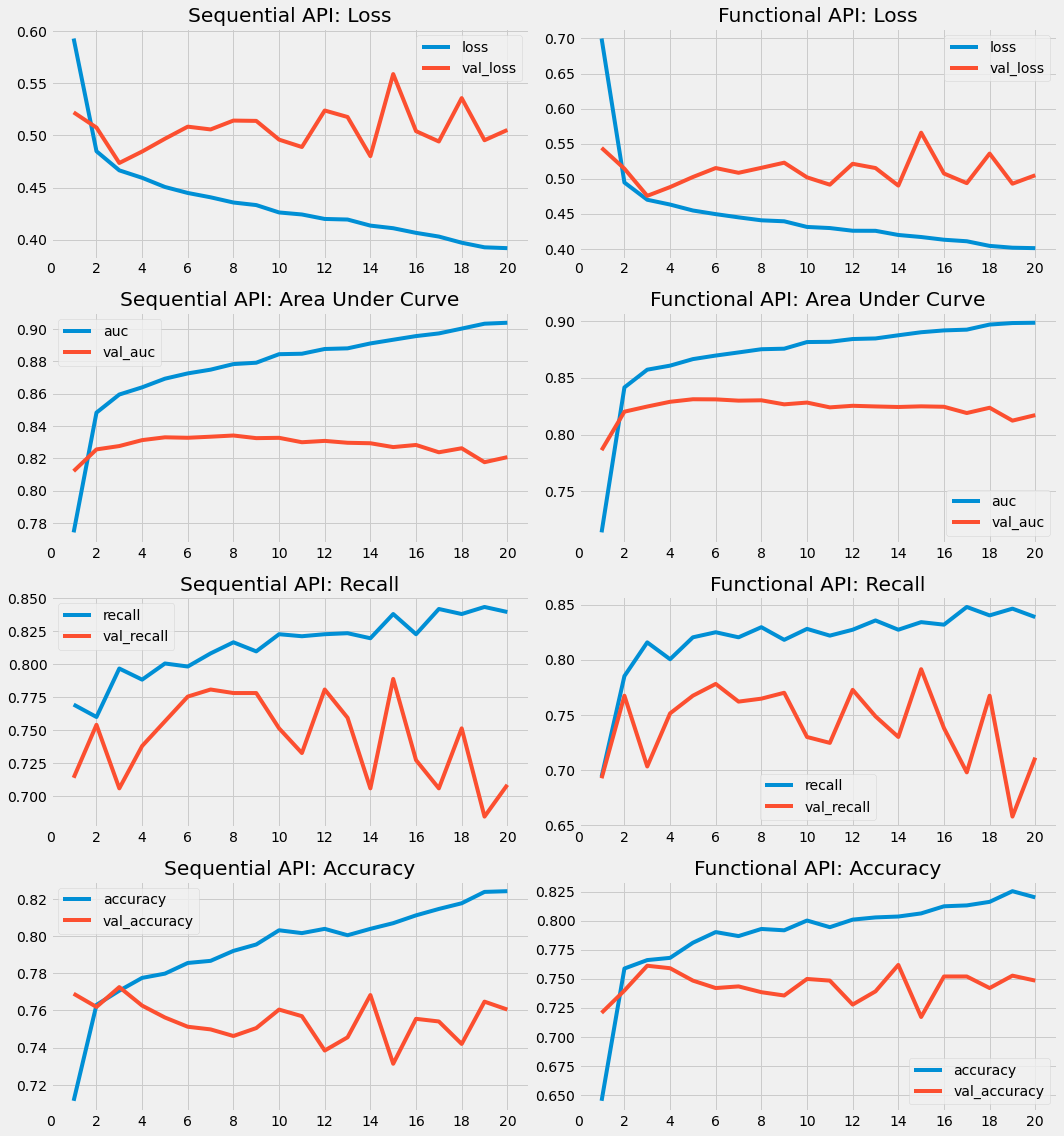

In [199]:
fig, axes = plt.subplots(4, 2, figsize = (15, 16))
xticks = range(0,22,2)
sequential_api_undersampling_df[["loss", "val_loss"]].plot.line(title='Sequential API: Loss', ax=axes[0,0])
axes[0,0].set_xticks(xticks)
functional_api_undersampling_df[["loss", "val_loss"]].plot.line(title='Functional API: Loss', ax=axes[0,1])
axes[0,1].set_xticks(xticks)

sequential_api_undersampling_df[["auc", "val_auc"]].plot.line(title='Sequential API: Area Under Curve', ax=axes[1,0])
axes[1,0].set_xticks(xticks)
functional_api_undersampling_df[["auc", "val_auc"]].plot.line(title='Functional API: Area Under Curve', ax=axes[1,1])
axes[1,1].set_xticks(xticks)

sequential_api_undersampling_df[["recall", "val_recall"]].plot.line(title='Sequential API: Recall', ax=axes[2,0])
axes[2,0].set_xticks(xticks)
functional_api_undersampling_df[["recall", "val_recall"]].plot.line(title='Functional API: Recall', ax=axes[2,1])
axes[2,1].set_xticks(xticks)

sequential_api_undersampling_df[["accuracy", "val_accuracy"]].plot.line(title='Sequential API: Accuracy', ax=axes[3,0])
axes[3,0].set_xticks(xticks)
functional_api_undersampling_df[["accuracy", "val_accuracy"]].plot.line(title='Functional API: Accuracy', ax=axes[3,1])
axes[3,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

**Undersampling Training Set**

Setelah undersampling kedua model, kinerja telah meningkat dalam recall dan model cenderung kurang overfitted daripada menggunakan oversampling tetapi tetap memperhatikan skor metrik evaluasi yang baik.


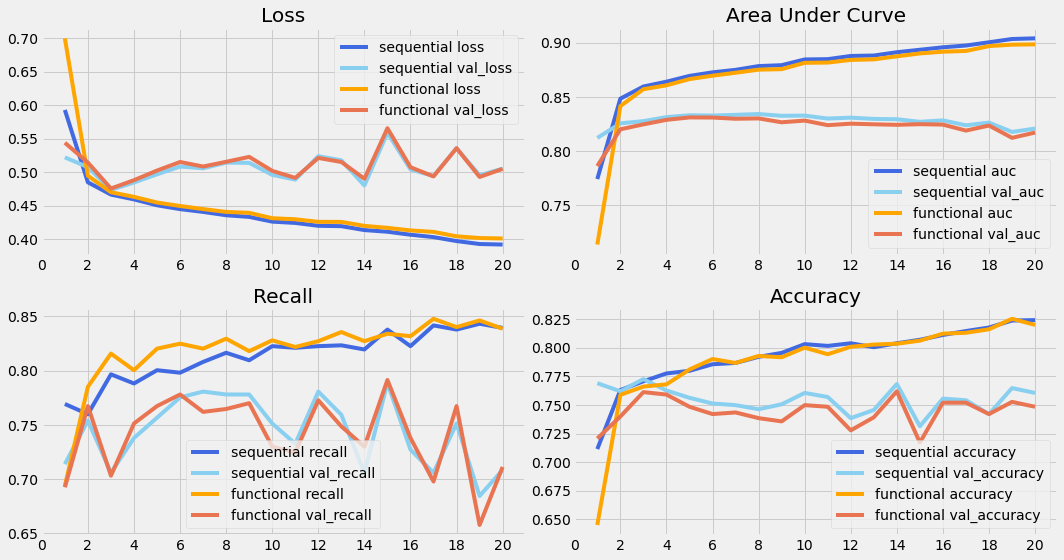

In [200]:
# concat the evaluation metrics to plot them in the same grid
model_evaluation_undersampling = pd.concat([sequential_api_undersampling_df.add_prefix('sequential '), functional_api_undersampling_df.add_prefix('functional ')], axis=1)

fig, axes = plt.subplots(2, 2, figsize = (15, 8))
xticks = range(0,22,2)
model_evaluation_undersampling[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].plot.line(
    title='Loss', ax=axes[0,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential loss", "sequential val_loss", "functional loss", "functional val_loss"]].columns]
)
axes[0,0].set_xticks(xticks)
model_evaluation_undersampling[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].plot.line(
    title='Area Under Curve', ax=axes[0,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential auc", "sequential val_auc", "functional auc", "functional val_auc"]].columns]
)
axes[0,1].set_xticks(xticks)

model_evaluation_undersampling[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].plot.line(
    title='Recall', ax=axes[1,0],
    color=[color_dict.get(x) for x in model_evaluation[["sequential recall", "sequential val_recall", "functional recall", "functional val_recall"]].columns]
)
axes[1,0].set_xticks(xticks)
model_evaluation_undersampling[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].plot.line(
    title='Accuracy', ax=axes[1,1],
    color=[color_dict.get(x) for x in model_evaluation[["sequential accuracy", "sequential val_accuracy", "functional accuracy", "functional val_accuracy"]].columns]
)
axes[1,1].set_xticks(xticks)

plt.tight_layout()
plt.show()

Cukup berbeda dengan eksperimen oversampling sebelumnya, dari plot di atas, kita dapat melihat bahwa kedua perbedaan model pada training dan set validasi mengalami penurunan.

### Evaluation of Base Model with Best Score

**Sequential API**

In [201]:
base_sequential_undersampling_test = base_sequential_model_undersampling.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.5025 - auc: 0.8110 - accuracy: 0.7443 - recall: 0.6791


In [202]:
y_proba_base_sequential_undersampling = base_sequential_model_undersampling.predict(X_test_trf)
y_pred_base_sequential_undersampling = np.where(y_proba_base_sequential_undersampling>0.5, 1, 0)

In [204]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_sequential_undersampling,digits=4)}")
print(f"Confusion Matrx:\n{confusion_matrix(y_test, y_pred_base_sequential_undersampling)}")

auc_sequential_base_undersampling = tf.keras.metrics.AUC()
auc_sequential_base_undersampling.update_state(y_test, y_proba_base_sequential_undersampling)
print(f"\nAUC: {auc_sequential_base_undersampling.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8687    0.7679    0.8152       517
           1     0.5142    0.6791    0.5853       187

    accuracy                         0.7443       704
   macro avg     0.6914    0.7235    0.7002       704
weighted avg     0.7745    0.7443    0.7541       704

Confusion Matrx:
[[397 120]
 [ 60 127]]

AUC: 0.8110448122024536


**Functional API**

In [205]:
base_functional_undersampling_test = base_functional_model_undersampling.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.5002 - auc: 0.8086 - accuracy: 0.7415 - recall: 0.7005


In [206]:
y_proba_base_functional_undersampling = base_functional_model_undersampling.predict(X_test_trf)
y_pred_base_functional_undersampling = np.where(y_proba_base_functional_undersampling>0.5, 1, 0)

In [207]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_base_functional_undersampling,digits=4)}")
print(f"Confusion Matrx:\n{confusion_matrix(y_test, y_pred_base_functional_undersampling)}")

auc_functional_base_undersampling = tf.keras.metrics.AUC()
auc_functional_base_undersampling.update_state(y_test, y_proba_base_functional_undersampling)
print(f"\nAUC: {auc_functional_base_undersampling.result().numpy()}")

Classification Report:
              precision    recall  f1-score   support

           0     0.8747    0.7563    0.8112       517
           1     0.5097    0.7005    0.5901       187

    accuracy                         0.7415       704
   macro avg     0.6922    0.7284    0.7006       704
weighted avg     0.7778    0.7415    0.7525       704

Confusion Matrx:
[[391 126]
 [ 56 131]]

AUC: 0.8085519671440125


Setelah melakukan percobaan di atas, metode sampling yang dipilih adalah undersampling, karena menunjukkan performansi model yang lebih baik dan kurang overfitted dibandingkan dengan hasil oversampling. Dan model yang akan digunakan adalah sequential API karena kinerja keseluruhan terhadap skenario pengambilan sampel yang berbeda.

## Hyperparameter Tuning

Saya akan meningkatkan kinerja model yang dipilih "Sequential API".

In [208]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [209]:
def sequential_api_for_tuning(learning_rate=0.001, inputs_shape=X_train.shape[1:], initializer=initializers.GlorotNormal(), hidden_activation_func='relu'):
    sequential_model = Sequential([
        Dense(50, activation=hidden_activation_func, kernel_initializer=initializer, input_shape=inputs_shape),
        Dense(20, activation=hidden_activation_func, kernel_initializer=initializer),
        Dense(10, activation=hidden_activation_func, kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])
    
    sequential_model.compile(
        loss=losses.BinaryCrossentropy(),
        optimizer=optimizers.Adam(
            name='Adam',
            learning_rate=learning_rate,
        ),
        metrics=metrics_list
    )
    
    return sequential_model

In [210]:
sequential_classifier = scikit_learn.KerasClassifier(sequential_api_for_tuning)

**Randomized Search**

In [211]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Kita kana mencoba 3 initializers berbeda dan 4 learning rates yang berbeda.

In [212]:
params = {
    'initializer':[initializers.GlorotNormal(), initializers.HeNormal(), initializers.RandomNormal()],
    'learning_rate':[0.00001, 0.0001, 0.001, 0.1]
}

scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'recall': 'recall'
}

sequentialsearch_cv = RandomizedSearchCV(sequential_classifier, params, n_iter=10, scoring=scoring, cv=stratified_kfold, verbose=2, refit='auc', return_train_score=True)
sequentialsearch_cv.fit(
    X_train_undersampling_trf, y_train_undersampling, epochs=100,
    validation_data = (X_val_trf, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
55/55 [==============================] - 1s 10ms/step - loss: 0.6714 - auc: 0.7707 - accuracy: 0.6893 - recall: 0.8748 - val_loss: 0.6633 - val_auc: 0.8161 - val_accuracy: 0.6851 - val_recall: 0.8342
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.5349 - auc: 0.8237 - accuracy: 0.7569 - recall: 0.8073 - val_loss: 0.5206 - val_auc: 0.8206 - val_accuracy: 0.7541 - val_recall: 0.7540
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 0.4760 - auc: 0.8536 - accuracy: 0.7724 - recall: 0.7913 - val_loss: 0.4963 - val_auc: 0.8274 - val_accuracy: 0.7633 - val_recall: 0.7647
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 0.4644 - auc: 0.8595 - accuracy: 0.7735 - recall: 0.7982 - val_loss: 0.5062 - val_auc: 0.8312 - val_accuracy: 0.7548 - val_recall: 0.7754
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 0.4570 - auc: 0.8638 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000252F78A0730>,
                   param_distributions={'initializer': [<keras.initializers.initializers_v2.GlorotNormal object at 0x00000252F4A37940>,
                                        'learning_rate': [1e-05, 0.0001, 0.001,
                                                          0.1]},
                   refit='auc', return_train_score=True,
                   scoring={'accuracy': 'accuracy', 'auc': 'roc_auc',
                            'recall': 'recall'},
                   verbose=2)

In [213]:
print(f"Best Parameters:\n{sequentialsearch_cv.best_params_}\n")
print(f"Best Score:{sequentialsearch_cv.best_score_}")

Best Parameters:
{'learning_rate': 0.0001, 'initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x00000252F553A470>}

Best Score:0.848693116460455


Best parameter untuk sequential API model adalah:
- learning rate dari Adam optimizer=0.0001
- kernel initializer on hidden layer: Random Normal

In [214]:
sequentialsearch_cv_df = pd.DataFrame(sequentialsearch_cv.cv_results_)
sequentialsearch_cv_df[['rank_test_auc', 'params', 'mean_test_auc', 'std_test_auc', 'mean_train_auc', 'std_train_auc', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'mean_test_accuracy', 'std_test_accuracy', 'mean_train_accuracy', 'std_train_accuracy']].sort_values('rank_test_auc').head(3)

,rank_test_auc,params,mean_test_auc,std_test_auc,mean_train_auc,std_train_auc,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,mean_test_accuracy,std_test_accuracy,mean_train_accuracy,std_train_accuracy
1,1,"{'learning_rate': 0.0001, 'initializer': <kera...",0.848693,0.004729,0.879271,0.002655,0.779817,0.012280,0.817278,0.002356,0.762615,0.007069,0.797592,0.003277
6,2,"{'learning_rate': 0.0001, 'initializer': <kera...",0.845065,0.005760,0.880190,0.004202,0.786697,0.023390,0.818425,0.012986,0.756116,0.007028,0.794151,0.002041
3,3,"{'learning_rate': 1e-05, 'initializer': <keras...",0.843021,0.006084,0.849265,0.003843,0.785168,0.024441,0.793578,0.029252,0.759174,0.004291,0.766820,0.005625


## Final Model

We will use the best parameter to build a final model and used it on model inference and deployment steps.

In [215]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [216]:
print(f"Best Parameters:\n{sequentialsearch_cv.best_params_}\n")

Best Parameters:
{'learning_rate': 0.0001, 'initializer': <keras.initializers.initializers_v2.RandomNormal object at 0x00000252F553A470>}



In [217]:
final_model = sequential_api_for_tuning(learning_rate=0.0001, initializer=initializers.RandomNormal())
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1300      
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


In [218]:
final_model_cb = ModelCheckpoint("model/final_model.h5", save_best_only=True)

final_model_history = final_model.fit(
    X_train_undersampling_trf, y_train_undersampling, epochs=100,
    validation_data=(X_val_trf, y_val),
    callbacks=[final_model_cb, EarlyStopping(patience=20)]
).history

Epoch 1/100
82/82 [==============================] - 2s 8ms/step - loss: 0.6926 - auc: 0.6749 - accuracy: 0.6453 - recall: 0.8977 - val_loss: 0.6929 - val_auc: 0.6454 - val_accuracy: 0.5366 - val_recall: 0.9171
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6894 - auc: 0.7440 - accuracy: 0.7114 - recall: 0.8846 - val_loss: 0.6902 - val_auc: 0.7940 - val_accuracy: 0.6596 - val_recall: 0.8476
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6793 - auc: 0.8182 - accuracy: 0.7343 - recall: 0.8884 - val_loss: 0.6833 - val_auc: 0.8061 - val_accuracy: 0.6716 - val_recall: 0.8369
Epoch 4/100
82/82 [==============================] - 0s 5ms/step - loss: 0.6557 - auc: 0.8314 - accuracy: 0.7504 - recall: 0.8693 - val_loss: 0.6673 - val_auc: 0.8115 - val_accuracy: 0.6894 - val_recall: 0.8316
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6154 - auc: 0.8394 - accuracy: 0.7607 - recall: 0.8547 - val_loss: 0.6438 - val_a

In [219]:
final_model_history_df = pd.DataFrame(final_model_history)

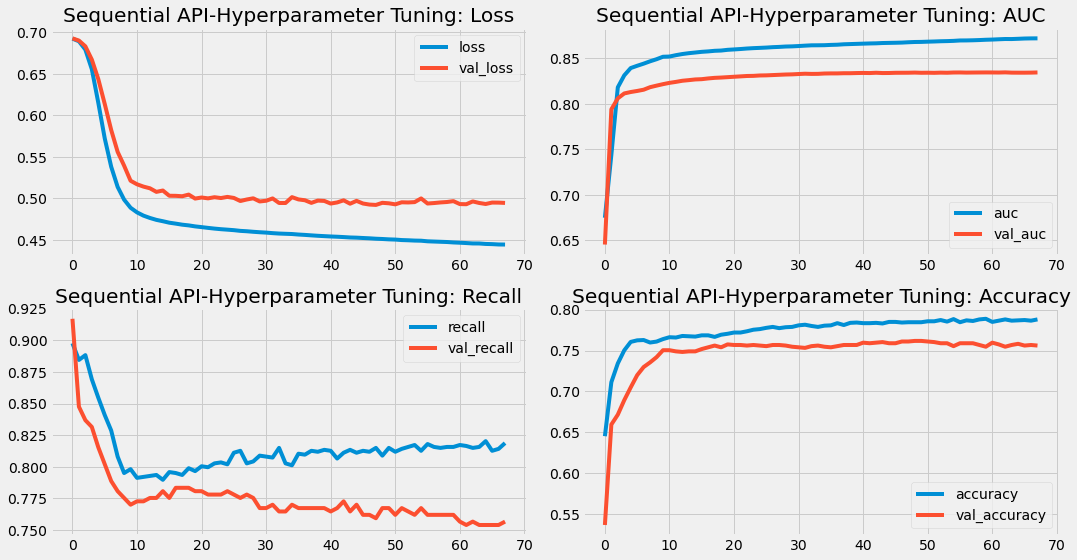

In [220]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

final_model_history_df[["loss", "val_loss"]].plot.line(title='Sequential API-Hyperparameter Tuning: Loss', ax=axes[0,0])

final_model_history_df[["auc", "val_auc"]].plot.line(title='Sequential API-Hyperparameter Tuning: AUC', ax=axes[0,1])

final_model_history_df[["recall", "val_recall"]].plot.line(title='Sequential API-Hyperparameter Tuning: Recall', ax=axes[1,0])

final_model_history_df[["accuracy", "val_accuracy"]].plot.line(title='Sequential API-Hyperparameter Tuning: Accuracy', ax=axes[1,1])

plt.tight_layout()
plt.show()

In [240]:
final_model_history_df.to_csv('final_model_history_df.csv')

Setelah melatih model menggunakan model API sekuensial terbaik dengan parameter sebagai berikut:
- 3 hidden layers, terdiri dari 50, 20, and 10 neurons.
- hidden layers activation function: ReLU
- hidden layer initializer: Random Normal
- optimizer and learning rate: Adam with lr=0.0001

Model terbaik didapatkan.


Skor AUC mencapai sekitar 85% pada train set dan 80% pada set validasi, skor tetap berada pada kisaran 80% yang berarti bahwa model tersebut cenderung sedikit overfit dibandingkan dengan eksperimen sebelumnya.

In [241]:
final_model_test = final_model.evaluate(X_test_trf, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.5215 - auc: 0.8194 - accuracy: 0.7315 - recall: 0.7540


# Model Saving

In [242]:
pickle.dump(input_pipeline, open('model/scaler.pkl', 'wb'))

Checking the final model:

In [243]:
final_model = keras.models.load_model("model/final_model.h5") # rollback to best model

# Model Inference

## New Data

Making prediction from random new data.

In [244]:
new_data = [
    [77, 40, 9000, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
    [22, 50, 3000, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
]

In [245]:
new_data_trf = input_pipeline.transform(new_data)

In [246]:
results = np.where(final_model.predict(new_data_trf)>0.5, 1, 0)

In [247]:
results

array([[0],
       [1]])

In [249]:
for i in range(len(results)):
    if results[i] == 1:
        print(f'Customer {i} memiliki kecenderungan tinggi untuk churn.')
    else:
        print(f'Customer {i} memiliki kecenderungan rendah untuk churn.')

Customer 0 memiliki kecenderungan rendah untuk churn.
Customer 1 memiliki kecenderungan tinggi untuk churn.


## Test Set

In [250]:
test_results = np.argmax(final_model.predict(X_test_trf), axis=1)

In [251]:
test_results_df = pd.DataFrame({
    'actual':y_test,
    'prediction':test_results.flatten()
})
test_results_df.head(10)

,actual,prediction
2713,0,0
1613,0,0
2090,0,0
5787,1,0
6596,0,0
5423,1,0
1394,0,0
3286,1,0
2356,0,0
7033,0,0


# Conclusion

## Model Analysis

Metrik utama yang akan dievaluasi dalam masalah klasifikasi churn ini adalah AUC dan Recall karena ketidakseimbangan kelas dan metrik terpenting untuk bisnis karena kami ingin mengurangi jumlah False Negatives.

Dari percobaan awal, kita mendapatkan skor AUC yang cukup baik tetapi skor Recall yang buruk. Untuk memperbaiki model, ada beberapa percobaan yang dilakukan, yaitu:
1.  Training Sequential API dan Functional API models tanpa sampling dan hyperparameter tuning (random initializer dan default adam learning rate).
2.  Training Sequential API dan Functional API models dengan SMOTE oversampling dan tanpa hyperparameter tuning (random initializer & default adam learning rate).
3.  Training Sequential API dan Functional API models dengan Random undersampling dan tanpa hyperparameter tuning (random initializer & default adam learning rate).
4.  Training Sequential API model dengan Random undersampling dengan hyperparameter tuning (Random Normal dan optimizer adam lr=0.0001 sebagai best params).

Model terbaik dicapai pada percobaan ke-4.

Setelah melatih model menggunakan model API sekuensial terbaik dengan parameter sebagai berikut:
- 3 hidden layers, terdiri dari 50, 20, and 10 neurons.
- hidden layers activation function: ReLU
- hidden layer initializer: Random Normal
- optimizer and learning rate: Adam with lr=0.0001

Model terbaik didapatkan. 

Skor AUC mencapai sekitar 85% pada train set dan 80% pada set validasi, skor tetap berada pada kisaran 80% yang berarti bahwa model tersebut cenderung sedikit overfit dibandingkan dengan eksperimen sebelumnya.